# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

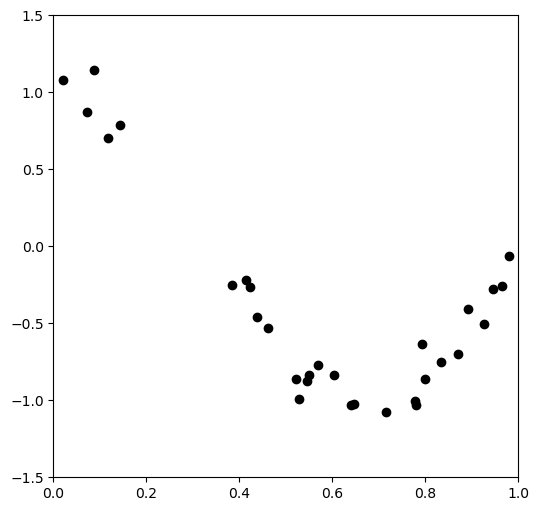

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

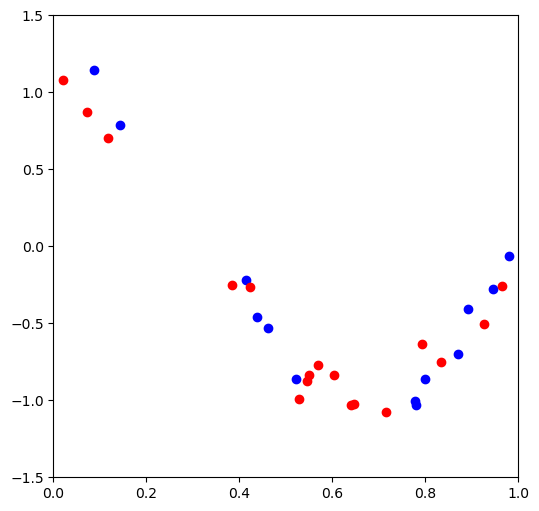

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
from sklearn import linear_model

In [6]:
X1=np.vstack(X1)
X2=np.vstack(X2)
model1 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model1.fit(X1, y1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

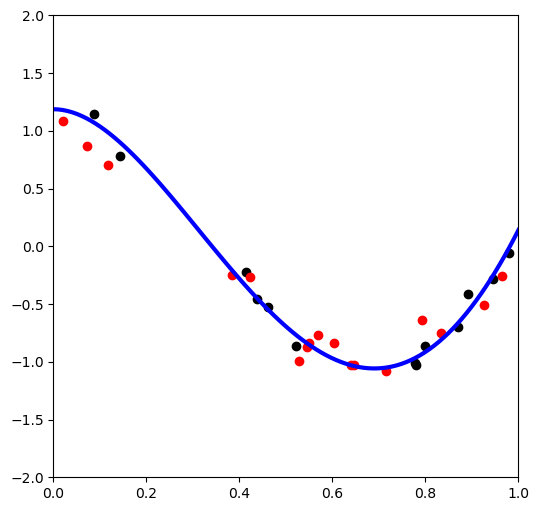

R^2: 0.9513799668593271


In [7]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='black')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
plt.show()
print("R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))


In [8]:
model2 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model2.fit(X1, y1)

model3 = make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())
model3.fit(X1, y1)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

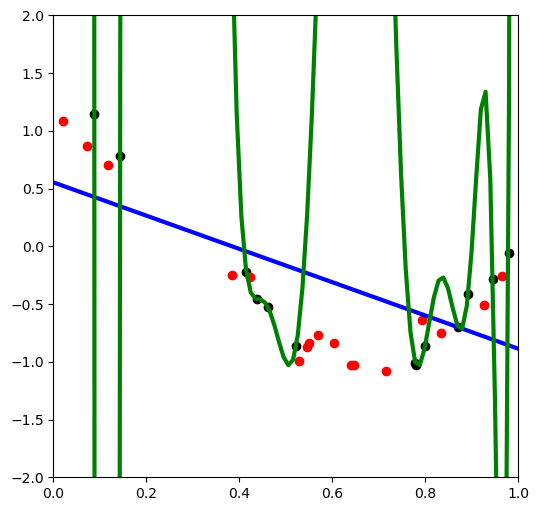

mode11 R^2: 0.9513799668593271
model2 R^2: 0.4405716416224198
model3 R^2: -897404.1472123264


In [9]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-2,2])
plt.scatter(X1, y1,  color='black')
plt.scatter(X2, y2,  color='red')
x_plot = np.vstack(np.linspace(0, 1, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.plot(x_plot, model3.predict(x_plot), color='green',linewidth=3)
plt.show()
print("mode11 R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))
print("model2 R^2: {}".format(metrics.r2_score(y2, model2.predict(X2))))
print("model3 R^2: {}".format(metrics.r2_score(y2, model3.predict(X2))))

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


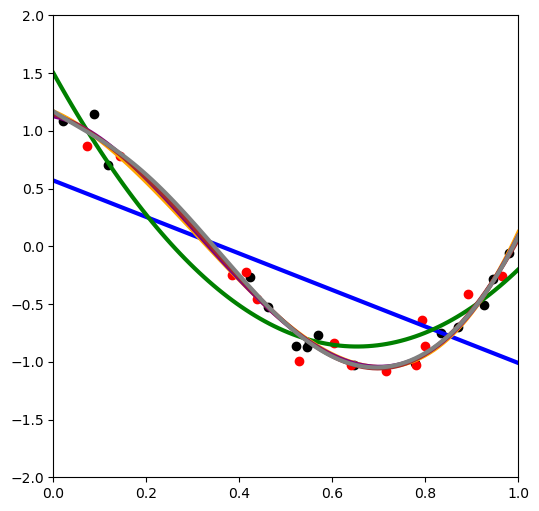

model1 R^2: 0.46801648638963256
model2 R^2: 0.9047352982206285
model3 R^2: 0.9473155880476519
model4 R^2: 0.9500601917456785
model5 R^2: 0.95136124399457
model6 R^2: 0.9523904815522596


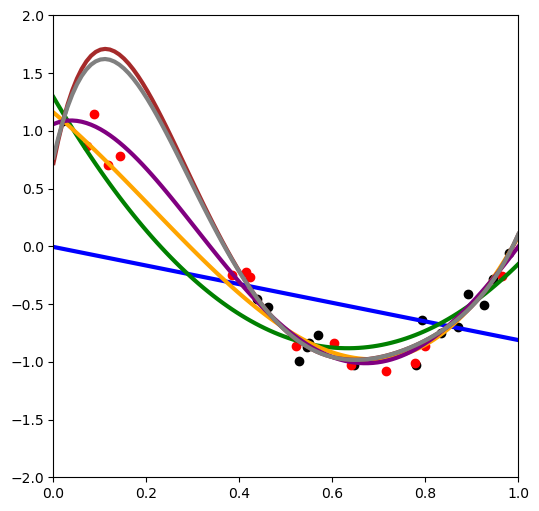

model1 R^2: 0.3699683324103672
model2 R^2: 0.8927331495813691
model3 R^2: 0.9637974422613211
model4 R^2: 0.9717125633941432
model5 R^2: 0.6697207771040733
model6 R^2: 0.729980809613008


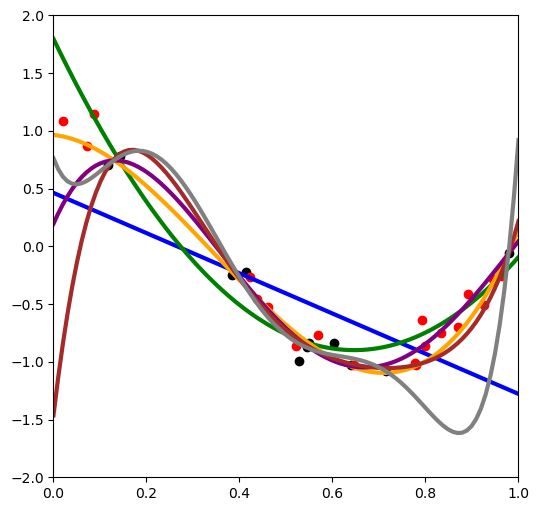

model1 R^2: 0.4278672151036199
model2 R^2: 0.9041758513175471
model3 R^2: 0.951294771912485
model4 R^2: 0.8830436900690677
model5 R^2: 0.38735904322981796
model6 R^2: 0.29590520776761875


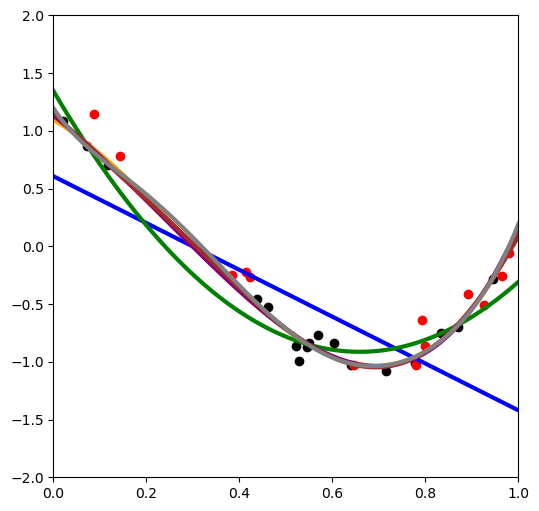

model1 R^2: -0.05296314418542214
model2 R^2: 0.8266603792735066
model3 R^2: 0.9280169985636669
model4 R^2: 0.9201813843673528
model5 R^2: 0.926762039996917
model6 R^2: 0.9277269189395283


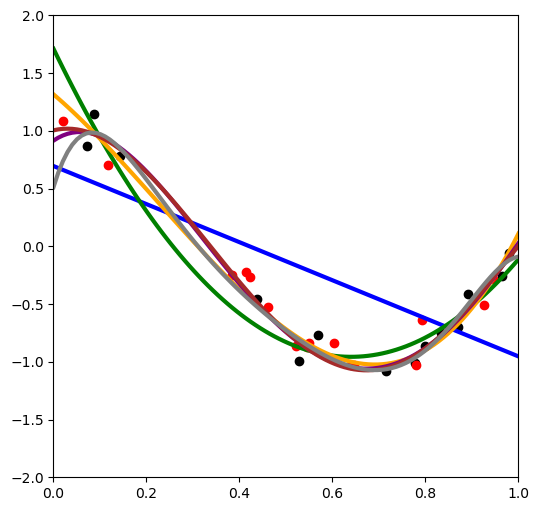

model1 R^2: 0.313939147628841
model2 R^2: 0.8597954099124373
model3 R^2: 0.9527207661781146
model4 R^2: 0.9536533543904765
model5 R^2: 0.9567719967441248
model6 R^2: 0.9233966736162281


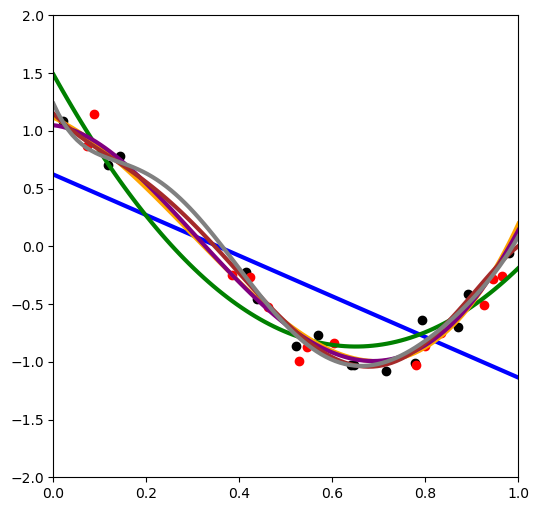

model1 R^2: 0.3929497172740899
model2 R^2: 0.9314410637152275
model3 R^2: 0.9603957255351543
model4 R^2: 0.9635393581768666
model5 R^2: 0.9571407589500882
model6 R^2: 0.9541478969585714


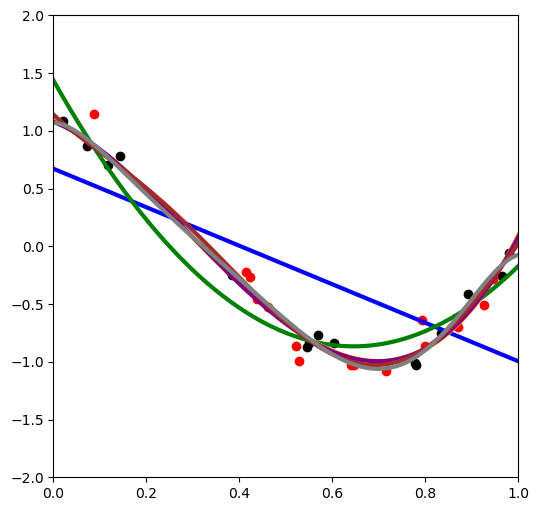

model1 R^2: 0.17570116261579694
model2 R^2: 0.8653272012352563
model3 R^2: 0.9301862490205949
model4 R^2: 0.9323418168259623
model5 R^2: 0.9346347268323176
model6 R^2: 0.9270685342775681


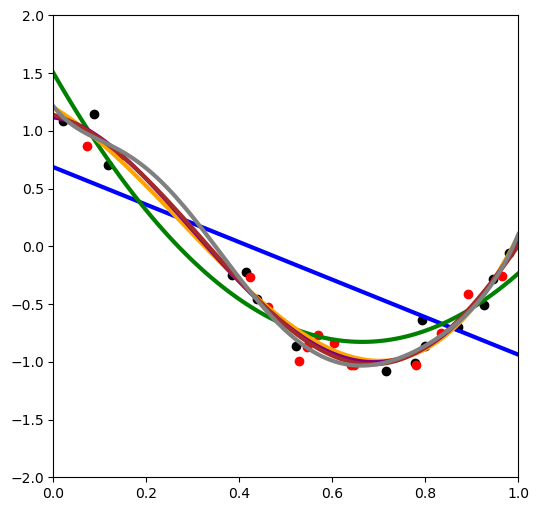

model1 R^2: 0.19599016653688162
model2 R^2: 0.9207253173369085
model3 R^2: 0.9652951938470847
model4 R^2: 0.9690505092090391
model5 R^2: 0.9713341094659786
model6 R^2: 0.9689420308850631


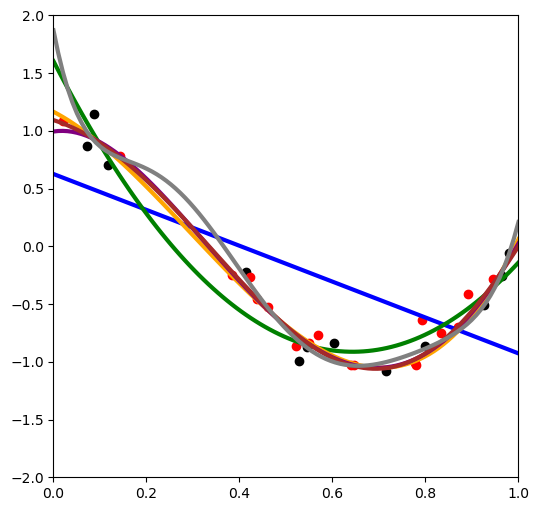

model1 R^2: 0.37753810612648286
model2 R^2: 0.8946231159543393
model3 R^2: 0.9601138874849748
model4 R^2: 0.9650142164761886
model5 R^2: 0.9677548002487031
model6 R^2: 0.9281502146482487


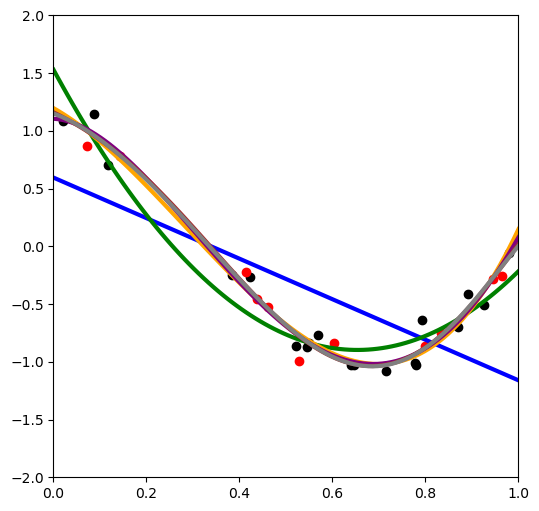

model1 R^2: 0.3749722807474184
model2 R^2: 0.9183392759031599
model3 R^2: 0.9675794880095846
model4 R^2: 0.9706797537993926
model5 R^2: 0.9738049414848646
model6 R^2: 0.9731071134760014


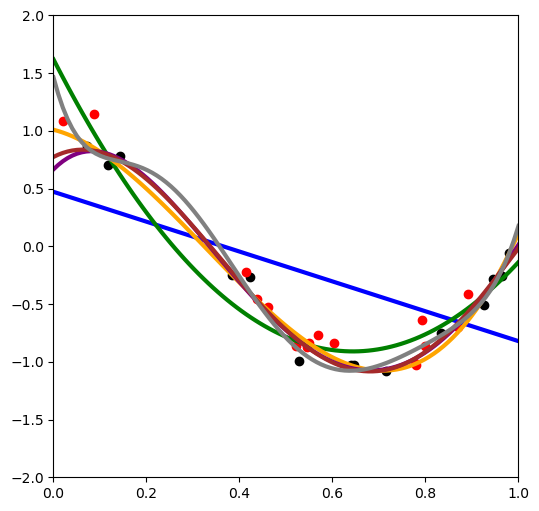

model1 R^2: 0.4354269041137392
model2 R^2: 0.9169022134470602
model3 R^2: 0.9455298637338143
model4 R^2: 0.9330500097580489
model5 R^2: 0.9411869543842396
model6 R^2: 0.9391726462219763


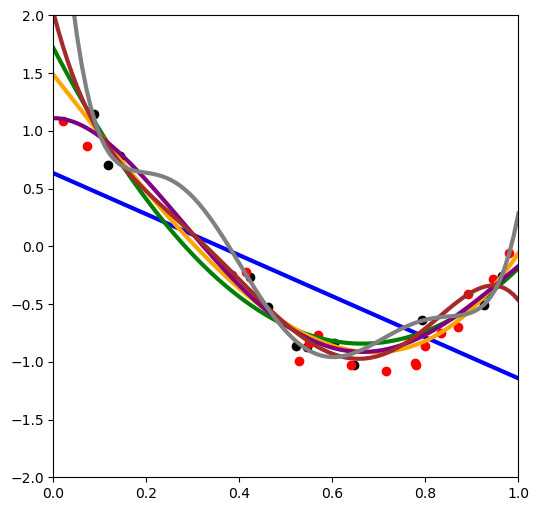

model1 R^2: 0.4022510099581913
model2 R^2: 0.8746237885807926
model3 R^2: 0.9370121171281909
model4 R^2: 0.9491021574253629
model5 R^2: 0.8547431328234805
model6 R^2: 0.3750673902753109


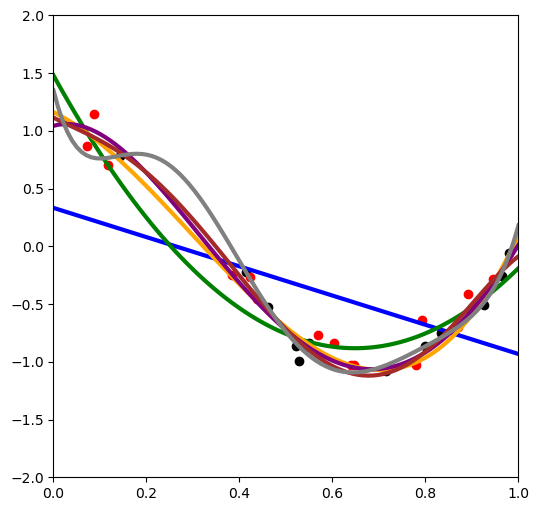

model1 R^2: 0.5532655564808922
model2 R^2: 0.9324451466619378
model3 R^2: 0.9578235078501137
model4 R^2: 0.9585710214422021
model5 R^2: 0.9583918497644146
model6 R^2: 0.9348863187479567


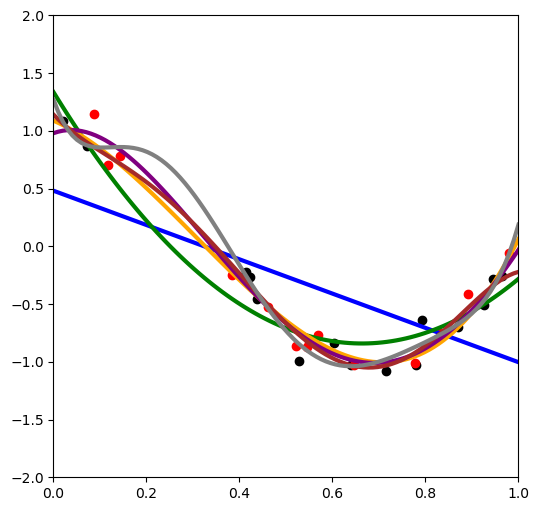

model1 R^2: 0.47548576609673954
model2 R^2: 0.9280087382476013
model3 R^2: 0.9743241958156852
model4 R^2: 0.9776694806793857
model5 R^2: 0.9726866217717375
model6 R^2: 0.9638191206721436


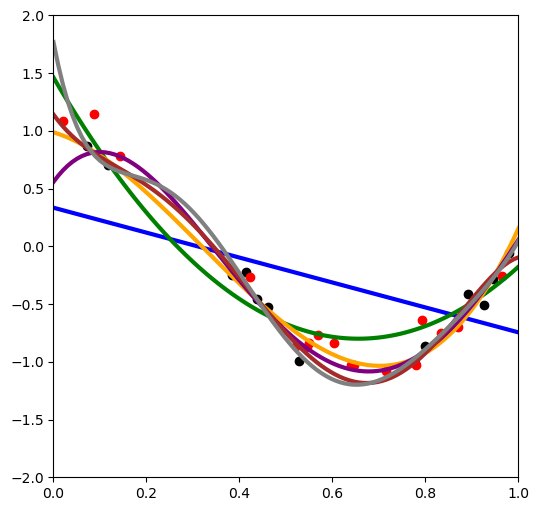

model1 R^2: 0.40347796008924897
model2 R^2: 0.9309466879976747
model3 R^2: 0.9638931327636344
model4 R^2: 0.9445393992632573
model5 R^2: 0.9486352321381689
model6 R^2: 0.9248263082327794


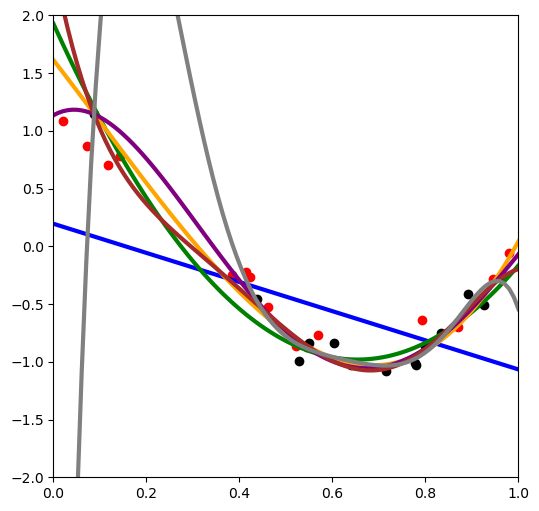

model1 R^2: 0.3275117983267992
model2 R^2: 0.814753309599307
model3 R^2: 0.9050907111657184
model4 R^2: 0.9326156963107279
model5 R^2: 0.7825572329441282
model6 R^2: -10.272467876962596


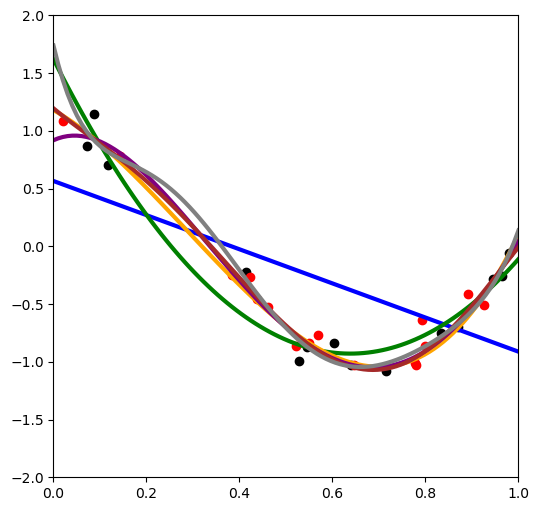

model1 R^2: 0.46431638084673066
model2 R^2: 0.8824420359304752
model3 R^2: 0.9619983762040614
model4 R^2: 0.9644732268883025
model5 R^2: 0.9681271622319895
model6 R^2: 0.944111895616439


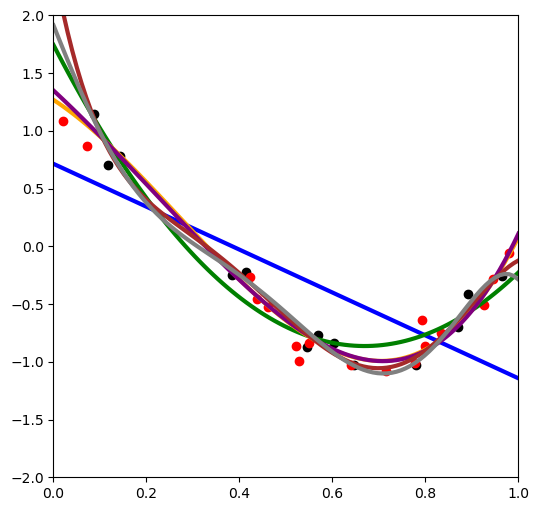

model1 R^2: 0.31428206203659037
model2 R^2: 0.8764426907680047
model3 R^2: 0.956948000292765
model4 R^2: 0.950677413774262
model5 R^2: 0.787712602395195
model6 R^2: 0.8599108884376092


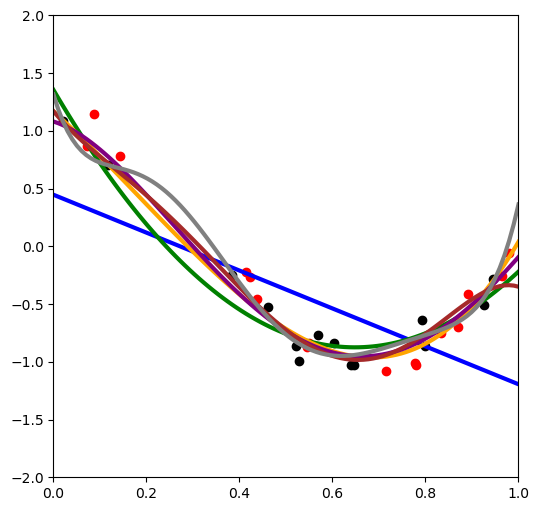

model1 R^2: 0.41092874237016874
model2 R^2: 0.8963224905876325
model3 R^2: 0.9538638762177858
model4 R^2: 0.9541441774668215
model5 R^2: 0.9420318595842387
model6 R^2: 0.9400313592073634


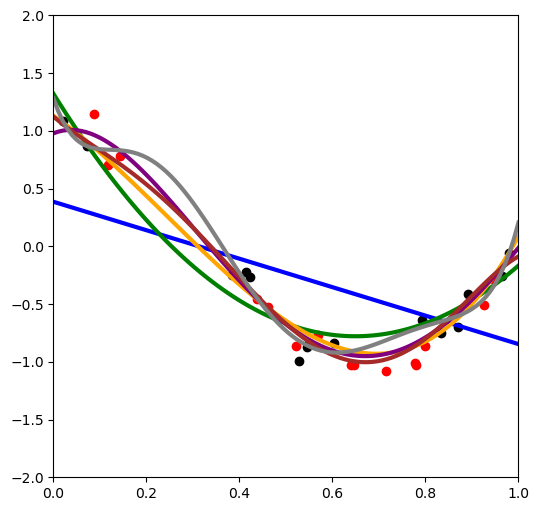

model1 R^2: 0.47668525245258775
model2 R^2: 0.9016416605632421
model3 R^2: 0.9671882678417203
model4 R^2: 0.9705212899500684
model5 R^2: 0.9717045193175922
model6 R^2: 0.9408648538074081


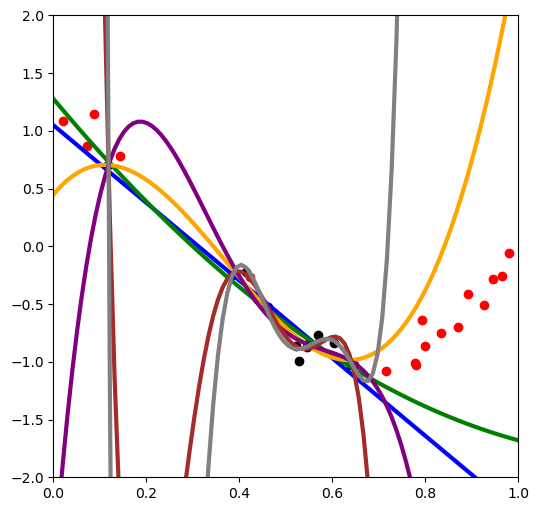

model1 R^2: -1.381253719146355
model2 R^2: -0.214550500998548
model3 R^2: -1.1080115658909646
model4 R^2: -54.95996766726572
model5 R^2: -23366.696794016374
model6 R^2: -102821.55870708382


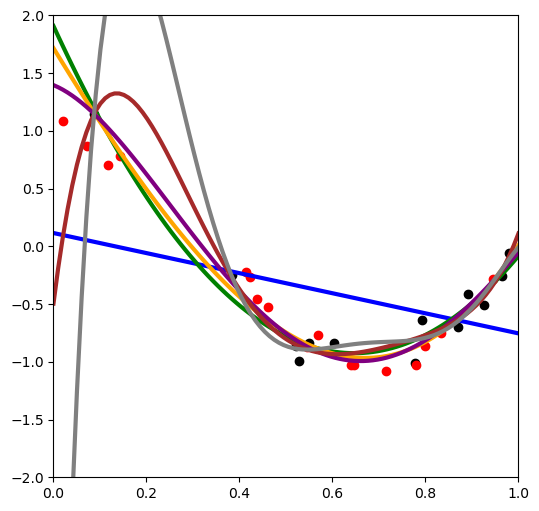

model1 R^2: 0.45731902881255115
model2 R^2: 0.8746073453771261
model3 R^2: 0.9203370371523657
model4 R^2: 0.9446413382894063
model5 R^2: 0.7768436116584334
model6 R^2: -3.299431010720107


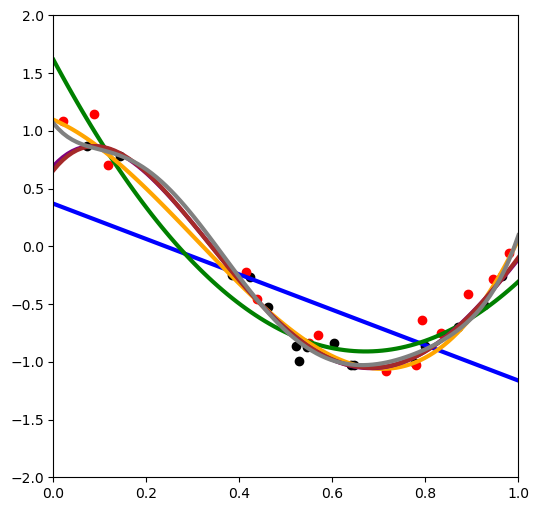

model1 R^2: 0.39886673775034653
model2 R^2: 0.9131865818724697
model3 R^2: 0.9557188269722203
model4 R^2: 0.9424954563900935
model5 R^2: 0.9399605054074649
model6 R^2: 0.9541127131831956


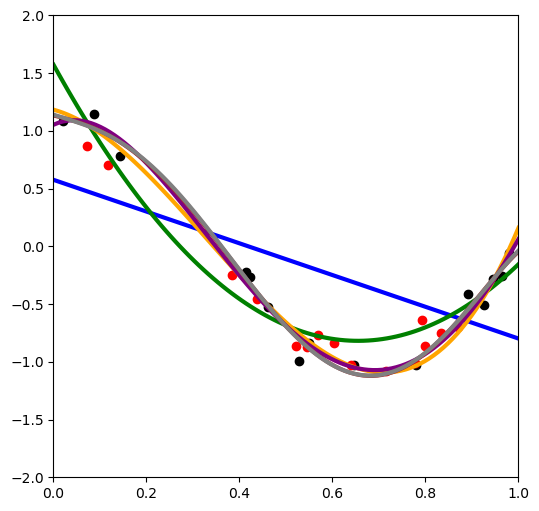

model1 R^2: 0.2655627217902232
model2 R^2: 0.9215227736418075
model3 R^2: 0.9343906659867698
model4 R^2: 0.9389509929822195
model5 R^2: 0.9368381505087776
model6 R^2: 0.9374119597698101


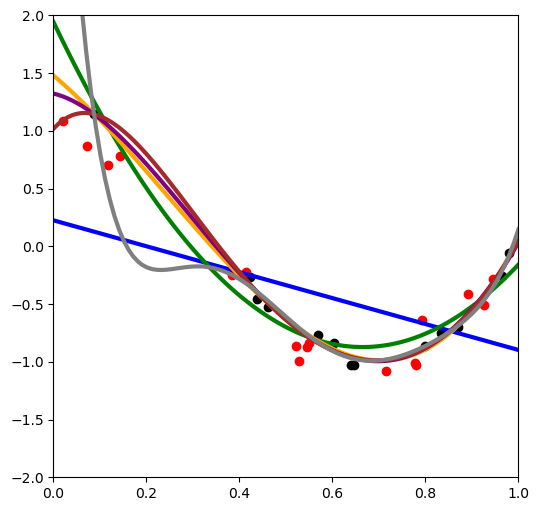

model1 R^2: 0.5003525729062122
model2 R^2: 0.8608341464573861
model3 R^2: 0.9292404300757875
model4 R^2: 0.9366196270109658
model5 R^2: 0.9373858771242287
model6 R^2: -0.3478670402962216


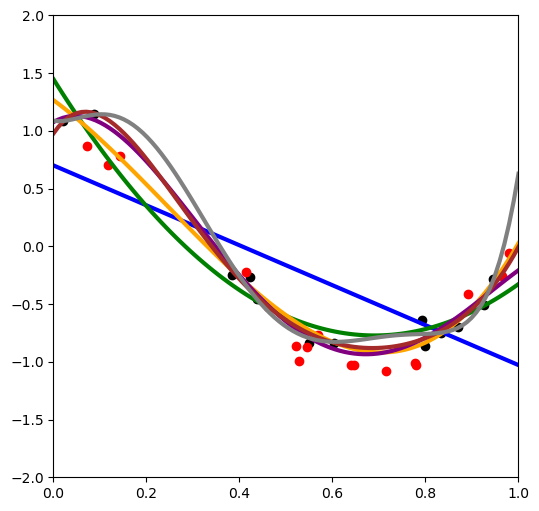

model1 R^2: 0.31081090101432574
model2 R^2: 0.8816867695302184
model3 R^2: 0.9484066891290073
model4 R^2: 0.9328860457050838
model5 R^2: 0.913175087248375
model6 R^2: 0.8750867518958279


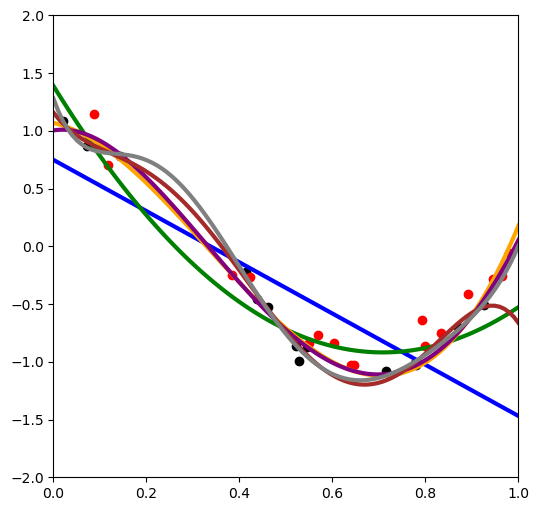

model1 R^2: -0.12039447199417608
model2 R^2: 0.8220900973166351
model3 R^2: 0.9244313554381303
model4 R^2: 0.9286088145843077
model5 R^2: 0.8451827281083995
model6 R^2: 0.9009349903944465


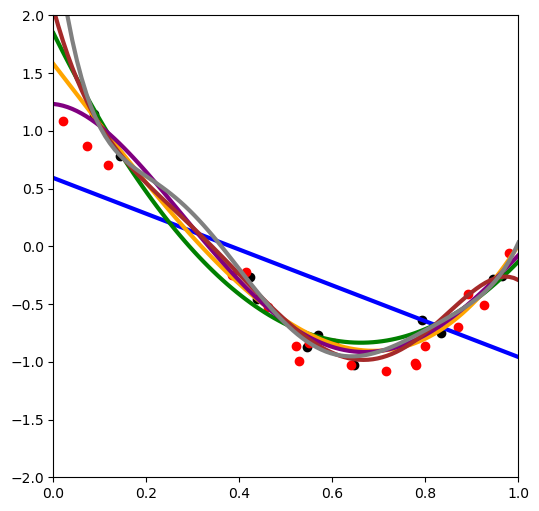

model1 R^2: 0.44918132900401764
model2 R^2: 0.860066077356548
model3 R^2: 0.9212487702675869
model4 R^2: 0.942177174111048
model5 R^2: 0.8715701591009071
model6 R^2: 0.7681488133158636


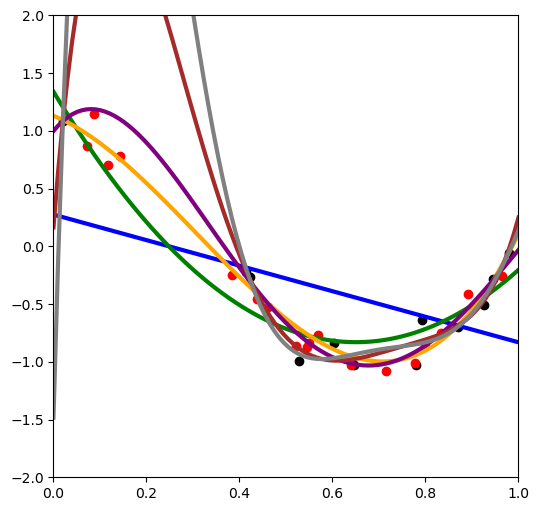

model1 R^2: 0.4828336626762785
model2 R^2: 0.9384132774453425
model3 R^2: 0.9783953747250037
model4 R^2: 0.9446904390099915
model5 R^2: -0.66098136956356
model6 R^2: -8.538501087465887


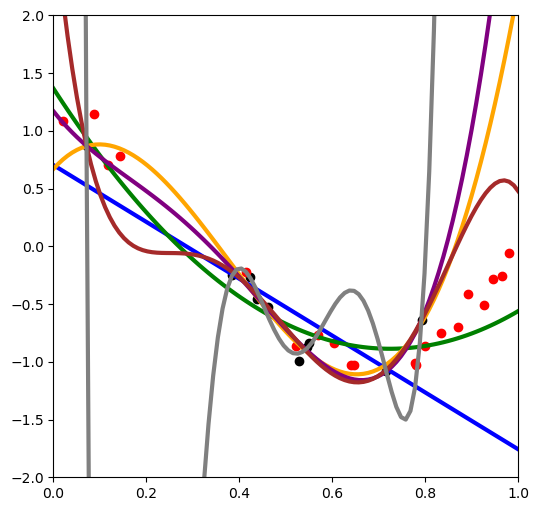

model1 R^2: -0.11439514062945033
model2 R^2: 0.8848452259269375
model3 R^2: -0.23722139157022037
model4 R^2: -2.5374783750533685
model5 R^2: 0.37136465403253216
model6 R^2: -5674.390221159695


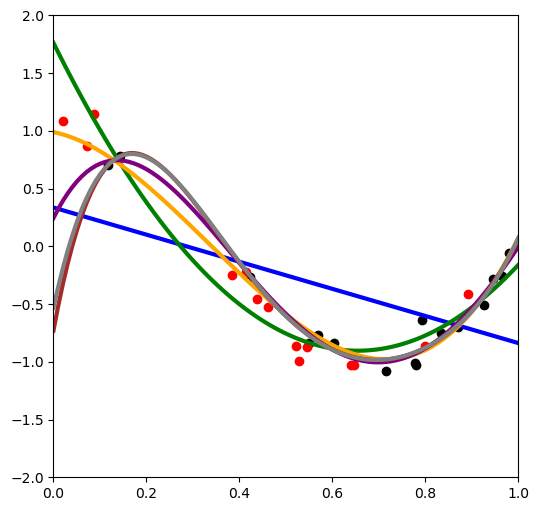

model1 R^2: 0.4873384653038847
model2 R^2: 0.9149343509891599
model3 R^2: 0.9563136349075688
model4 R^2: 0.8771571838575294
model5 R^2: 0.6413899686918478
model6 R^2: 0.6957980987689145


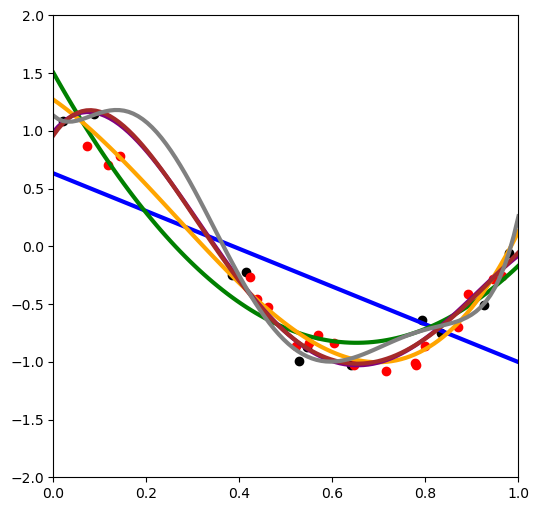

model1 R^2: 0.43171956052583105
model2 R^2: 0.926850537103589
model3 R^2: 0.9748860105735908
model4 R^2: 0.9264053452267406
model5 R^2: 0.9214074406669293
model6 R^2: 0.8768324380210417


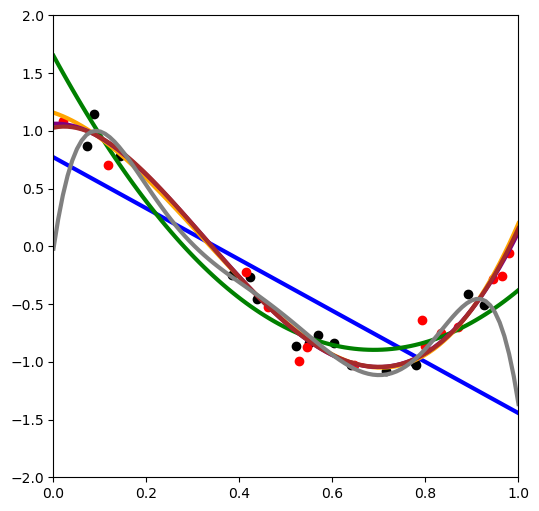

model1 R^2: -0.07961479650980552
model2 R^2: 0.865099531879608
model3 R^2: 0.9495399947915598
model4 R^2: 0.9555070733180869
model5 R^2: 0.9532330215961254
model6 R^2: 0.6684237113598541


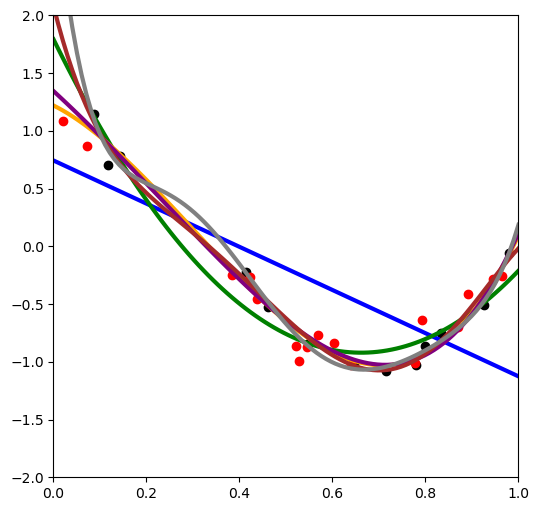

model1 R^2: 0.2976680373812638
model2 R^2: 0.8670421274189595
model3 R^2: 0.9471826367246519
model4 R^2: 0.9378434236551226
model5 R^2: 0.8513220337160781
model6 R^2: 0.5957773510679661


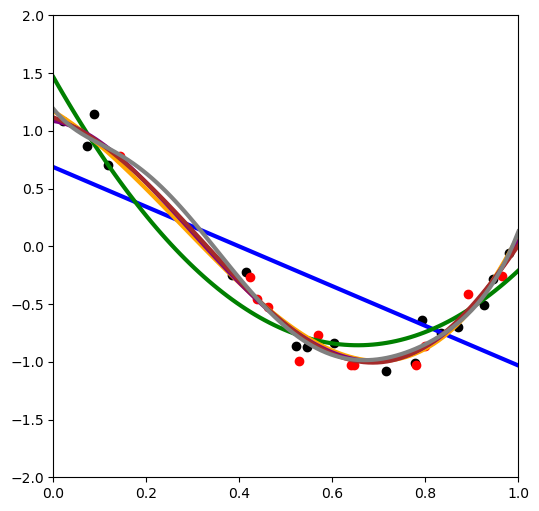

model1 R^2: 0.02320060344139574
model2 R^2: 0.8671771330188488
model3 R^2: 0.9504563562655575
model4 R^2: 0.9562222092253927
model5 R^2: 0.9596733762164138
model6 R^2: 0.9561963511012092


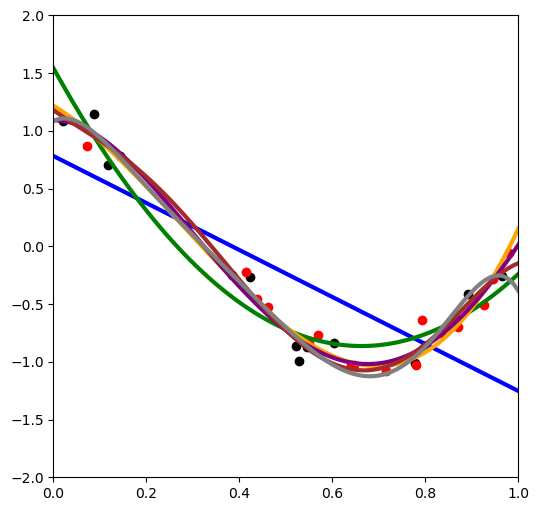

model1 R^2: -0.11390936585435374
model2 R^2: 0.8779196156720317
model3 R^2: 0.9493852875912046
model4 R^2: 0.9486807505260082
model5 R^2: 0.9457590451548731
model6 R^2: 0.9201044405972715


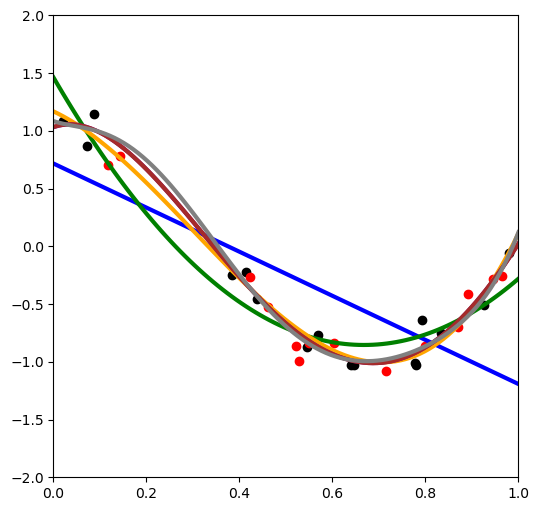

model1 R^2: 0.18454227665778689
model2 R^2: 0.9170389383238599
model3 R^2: 0.956988339556335
model4 R^2: 0.9559271525786188
model5 R^2: 0.9561718647949923
model6 R^2: 0.9512184111487065


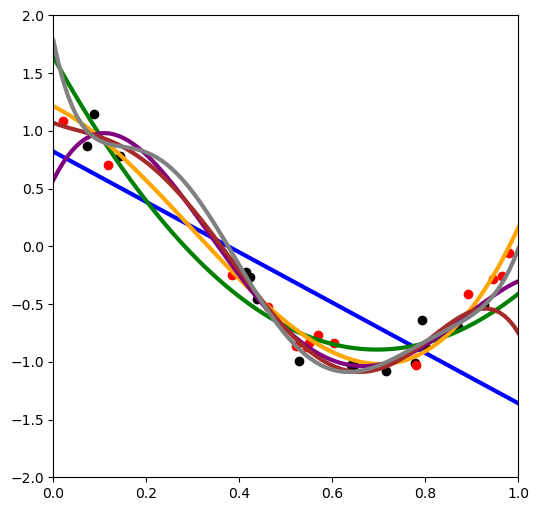

model1 R^2: -0.08343765090938482
model2 R^2: 0.8629747053640564
model3 R^2: 0.972449298205039
model4 R^2: 0.9115349443050477
model5 R^2: 0.8574249575693319
model6 R^2: 0.9066940393861189


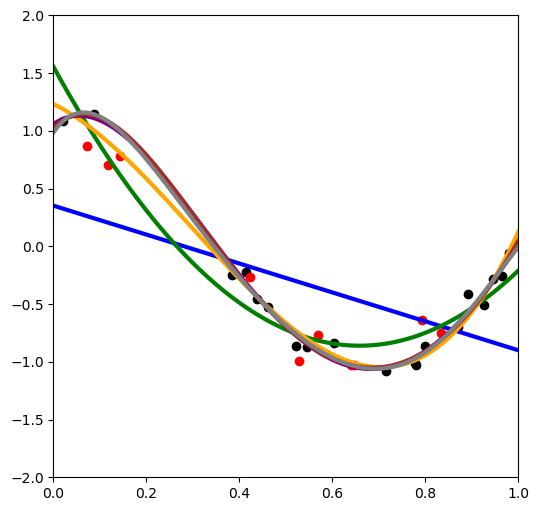

model1 R^2: 0.5913719460092932
model2 R^2: 0.9500704838557468
model3 R^2: 0.9524678529224744
model4 R^2: 0.931888466041304
model5 R^2: 0.9248589521306008
model6 R^2: 0.9225657010084043


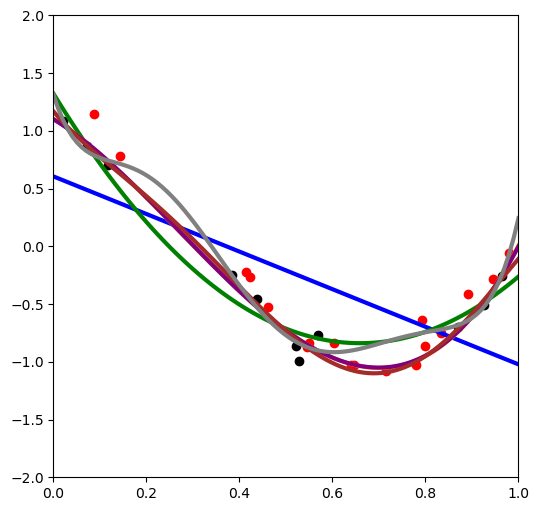

model1 R^2: 0.34534974063992396
model2 R^2: 0.8733076476771583
model3 R^2: 0.9349245357689016
model4 R^2: 0.9356928960717226
model5 R^2: 0.9334273621498156
model6 R^2: 0.917112459940702


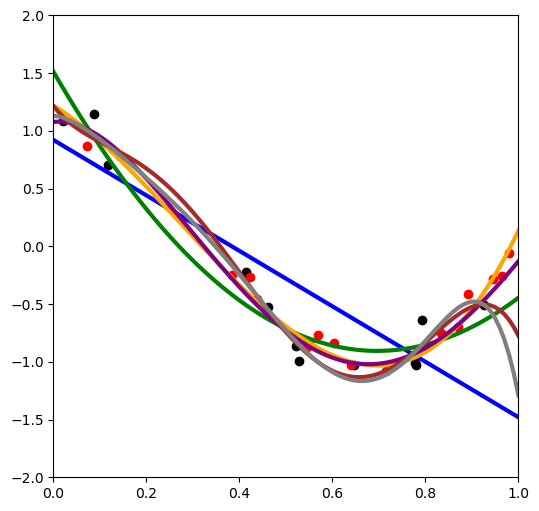

model1 R^2: -0.840830785960679
model2 R^2: 0.8010072151072419
model3 R^2: 0.9638615847225878
model4 R^2: 0.9468101101885384
model5 R^2: 0.8052076571297508
model6 R^2: 0.6261295023290336


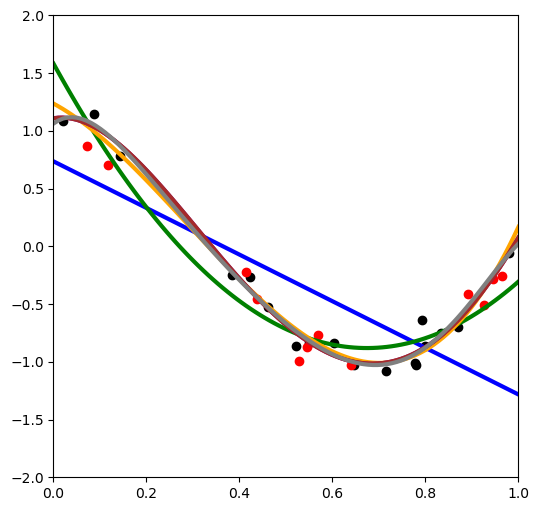

model1 R^2: 0.04851252406493145
model2 R^2: 0.9096682407353929
model3 R^2: 0.9445063375816708
model4 R^2: 0.9433746428195753
model5 R^2: 0.9431474639878369
model6 R^2: 0.9365457114624612


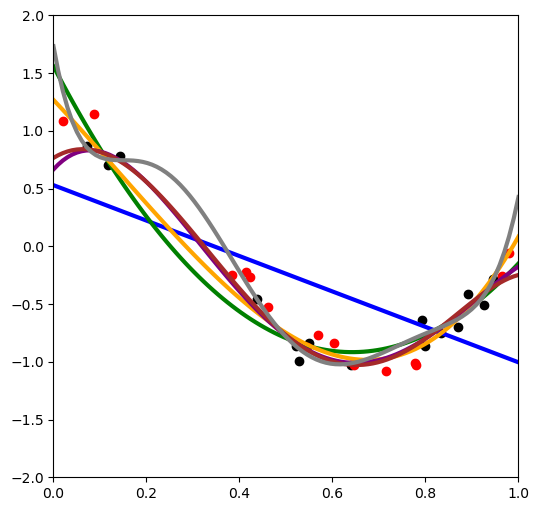

model1 R^2: 0.43692180447102547
model2 R^2: 0.8956791962607348
model3 R^2: 0.9511469661556469
model4 R^2: 0.9298029440700127
model5 R^2: 0.9362740103076154
model6 R^2: 0.9303218809247211


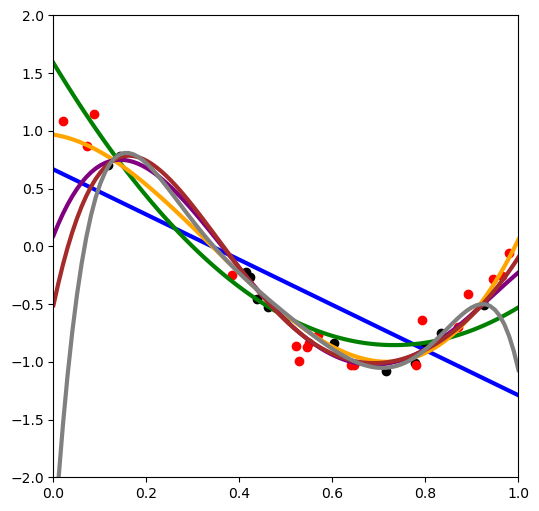

model1 R^2: 0.30642103143409527
model2 R^2: 0.8607012152596678
model3 R^2: 0.9493841831900096
model4 R^2: 0.8546451712075067
model5 R^2: 0.731146482311591
model6 R^2: -0.036791311840255414


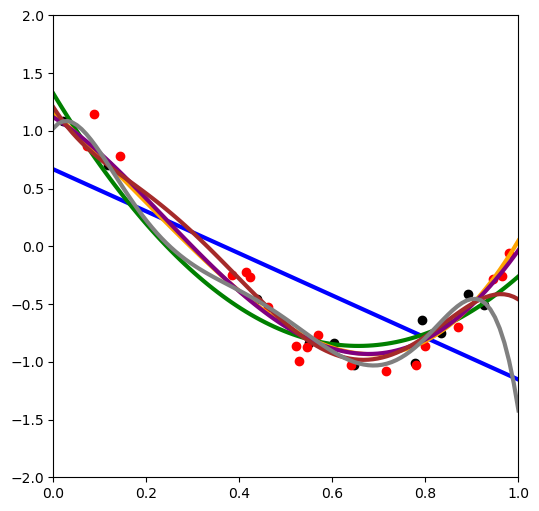

model1 R^2: 0.3636228918861676
model2 R^2: 0.8930065148197227
model3 R^2: 0.9517361614402258
model4 R^2: 0.9534472141607682
model5 R^2: 0.937095138104697
model6 R^2: 0.8070635837491149


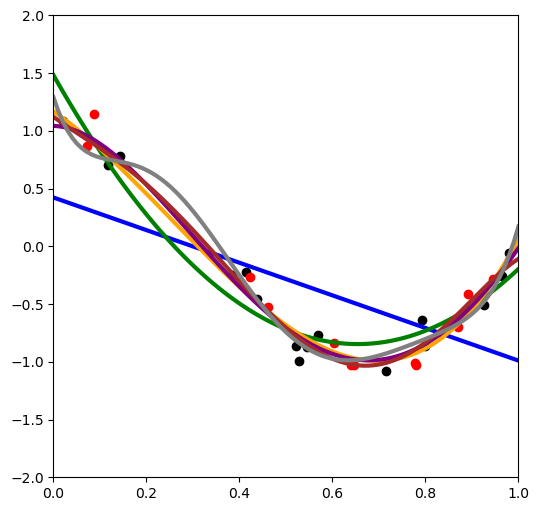

model1 R^2: 0.5417504056124263
model2 R^2: 0.9296790597121299
model3 R^2: 0.9719311150893054
model4 R^2: 0.971743442092211
model5 R^2: 0.9716506545619141
model6 R^2: 0.9508203117063009


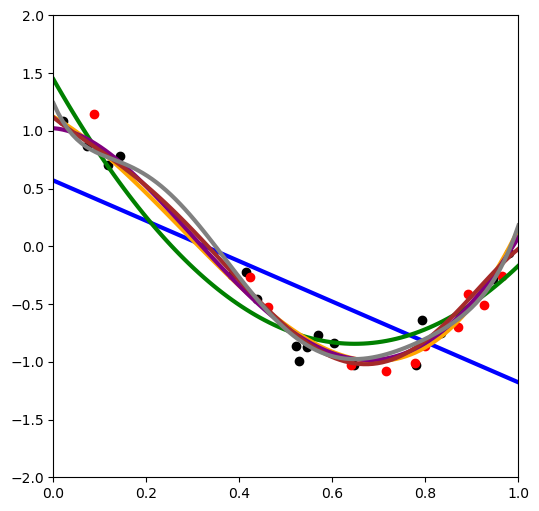

model1 R^2: 0.35739130847750433
model2 R^2: 0.8949620095917787
model3 R^2: 0.9538339899933431
model4 R^2: 0.9544110871075672
model5 R^2: 0.9506360649521508
model6 R^2: 0.9439119262982467


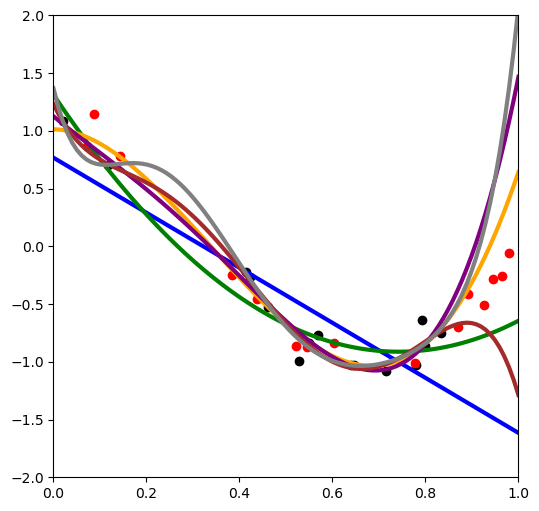

model1 R^2: -0.32039339689707425
model2 R^2: 0.7907204927128203
model3 R^2: 0.861391552040321
model4 R^2: 0.38657752875238627
model5 R^2: 0.6898254288948197
model6 R^2: 0.25855491222272353


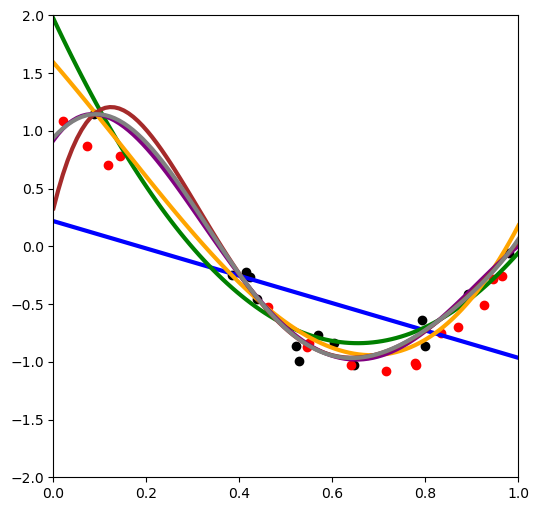

model1 R^2: 0.50655523737768
model2 R^2: 0.8539379241103014
model3 R^2: 0.9297548107264194
model4 R^2: 0.9319226519563892
model5 R^2: 0.8925722484942114
model6 R^2: 0.9302489019920617


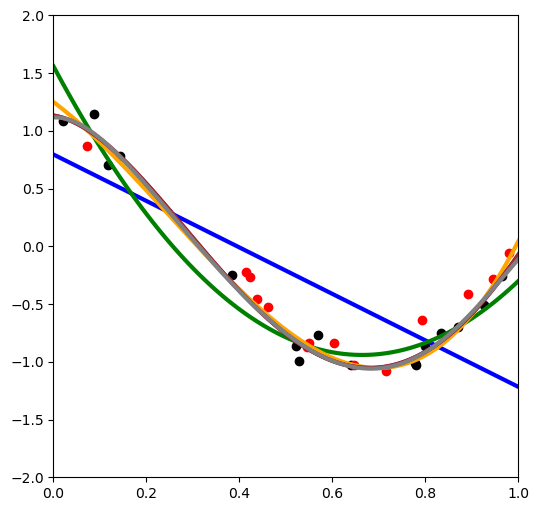

model1 R^2: -0.21671317255854783
model2 R^2: 0.8012440919708844
model3 R^2: 0.9099647715360362
model4 R^2: 0.900568866961679
model5 R^2: 0.9006600128905498
model6 R^2: 0.8989894092076034


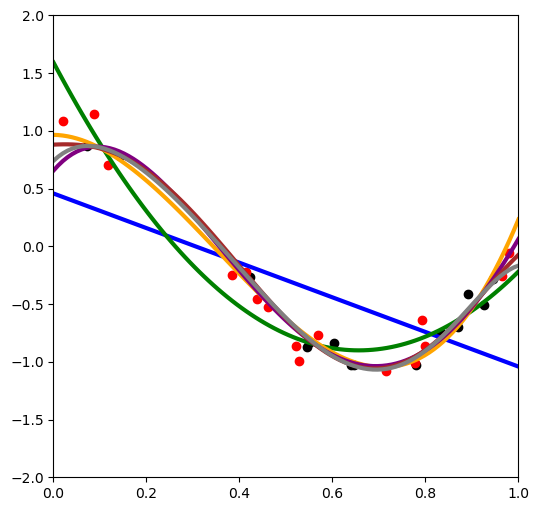

model1 R^2: 0.47091290354043447
model2 R^2: 0.9222619720427853
model3 R^2: 0.9518444953305343
model4 R^2: 0.9439453914771841
model5 R^2: 0.9513622304575506
model6 R^2: 0.9450939322465675


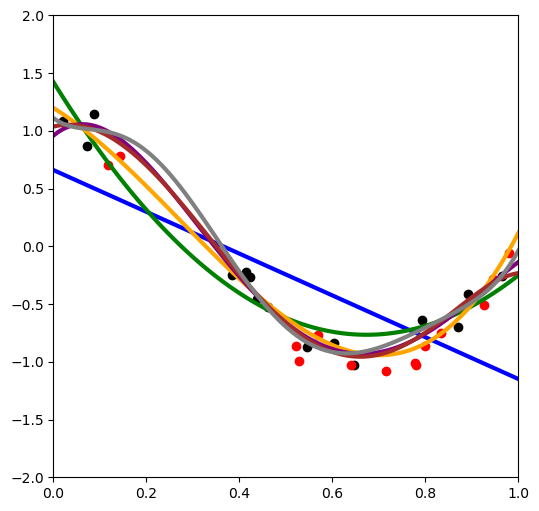

model1 R^2: 0.25624520690608954
model2 R^2: 0.8657957818653281
model3 R^2: 0.9547939332781475
model4 R^2: 0.9259859414266504
model5 R^2: 0.9291522190488712
model6 R^2: 0.9117755411156401


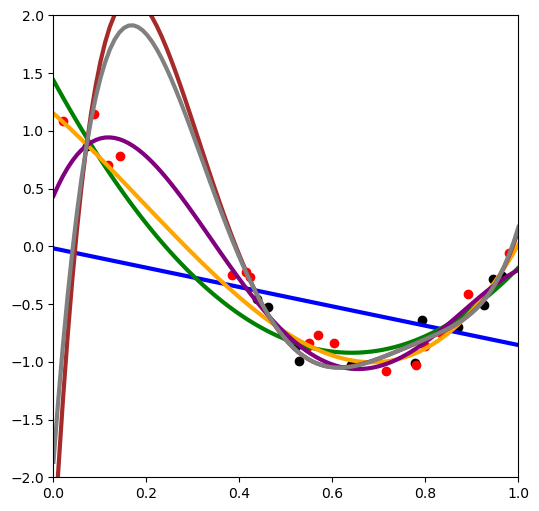

model1 R^2: 0.34603072349993447
model2 R^2: 0.9117263119745903
model3 R^2: 0.9566290088061634
model4 R^2: 0.9378413714608933
model5 R^2: -0.02868350689744581
model6 R^2: 0.31049238290285275


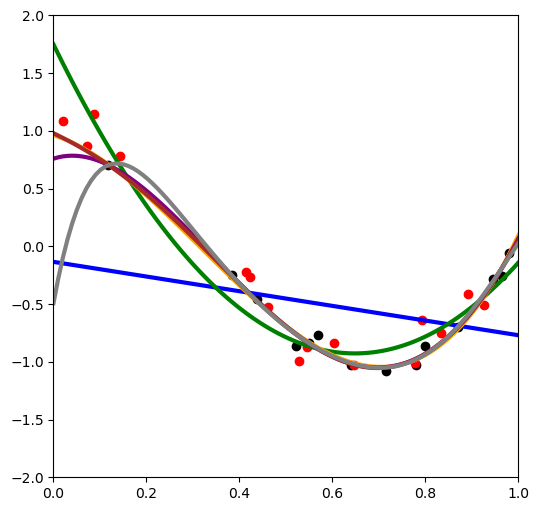

model1 R^2: 0.281369055372901
model2 R^2: 0.9149244452797066
model3 R^2: 0.9498843077830875
model4 R^2: 0.9412325129289567
model5 R^2: 0.9520811139005327
model6 R^2: 0.7695815855196063


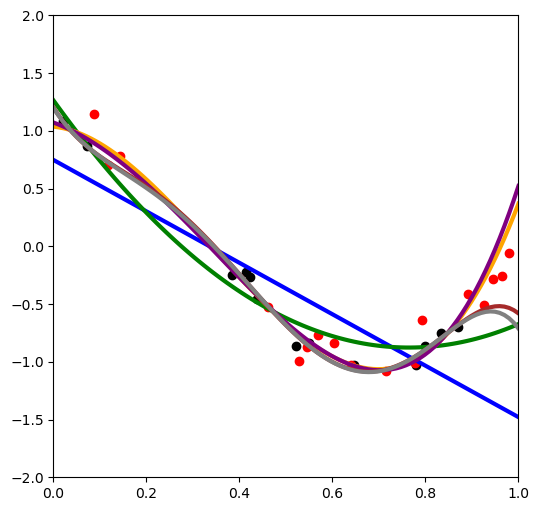

model1 R^2: 0.024263563764080676
model2 R^2: 0.7837369568342922
model3 R^2: 0.9391705509543654
model4 R^2: 0.9137111375442025
model5 R^2: 0.9059408036164396
model6 R^2: 0.8845189909429566


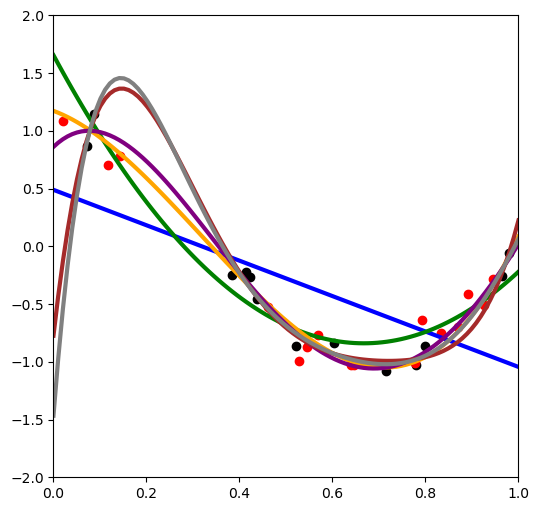

model1 R^2: 0.521779815816533
model2 R^2: 0.929571049187086
model3 R^2: 0.9556114462578741
model4 R^2: 0.955829316064379
model5 R^2: 0.6378639907956041
model6 R^2: 0.45217106332707313


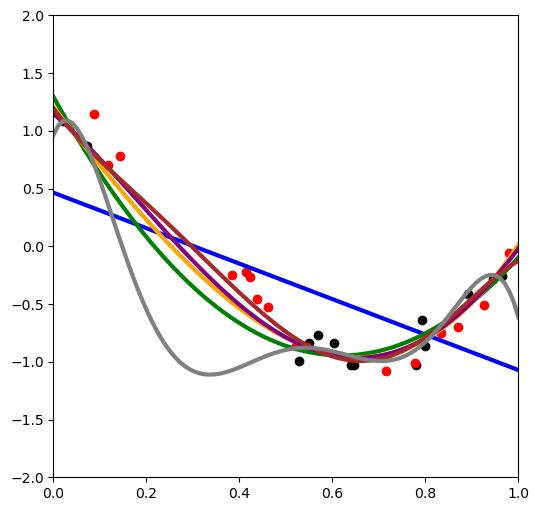

model1 R^2: 0.49853703593482357
model2 R^2: 0.8087180764925838
model3 R^2: 0.8965631540071465
model4 R^2: 0.9166435971238235
model5 R^2: 0.939863582990551
model6 R^2: 0.4847414410647093


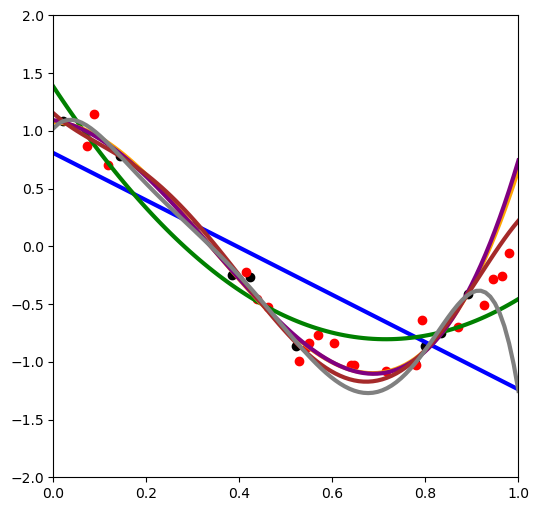

model1 R^2: 0.2573160402067469
model2 R^2: 0.8843636920207659
model3 R^2: 0.8749790885425349
model4 R^2: 0.8558254897858933
model5 R^2: 0.9223273112423178
model6 R^2: 0.8426892006235518


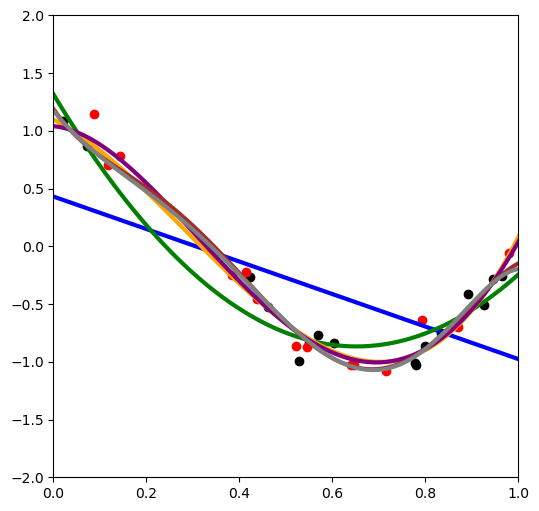

model1 R^2: 0.4862338704864012
model2 R^2: 0.9019858216551191
model3 R^2: 0.96636791874232
model4 R^2: 0.9712450019744473
model5 R^2: 0.9628458975762628
model6 R^2: 0.9607782488868344


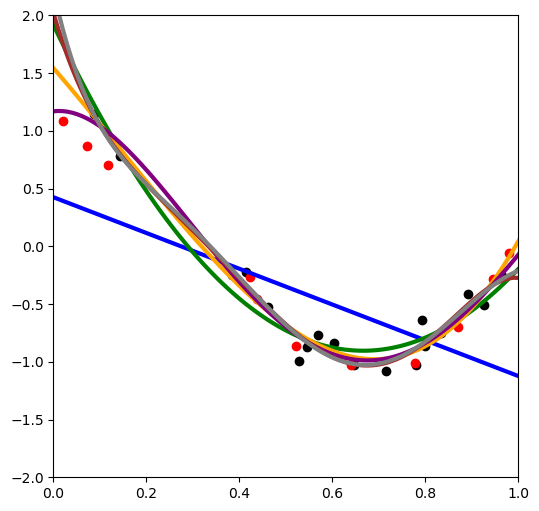

model1 R^2: 0.4376050411516953
model2 R^2: 0.8300844429692863
model3 R^2: 0.9343170469087295
model4 R^2: 0.9627660789262082
model5 R^2: 0.8661642238991482
model6 R^2: 0.8358704998585761


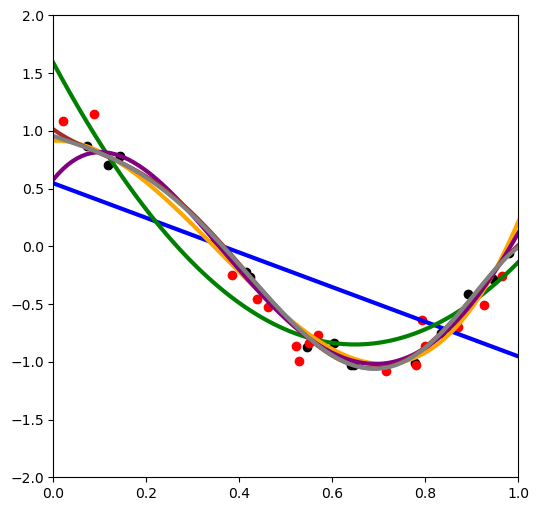

model1 R^2: 0.44839093889139947
model2 R^2: 0.9266932538719876
model3 R^2: 0.9379012661791258
model4 R^2: 0.9196565768016594
model5 R^2: 0.9370966722742713
model6 R^2: 0.9349093539585764


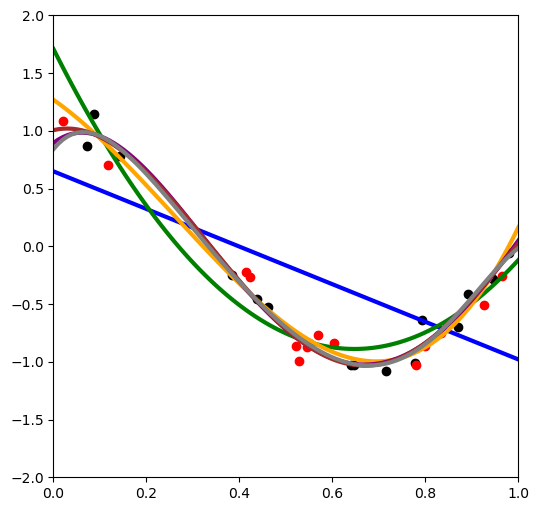

model1 R^2: 0.36664963788775107
model2 R^2: 0.8911035267588091
model3 R^2: 0.9561610149527899
model4 R^2: 0.9535969894867846
model5 R^2: 0.9572861521620479
model6 R^2: 0.9518401121044049


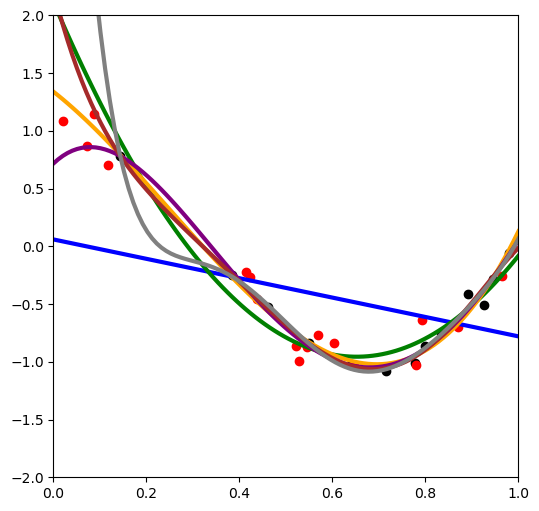

model1 R^2: 0.40323739287449745
model2 R^2: 0.823393754087951
model3 R^2: 0.9596234931371934
model4 R^2: 0.9567850766799085
model5 R^2: 0.8719145130561674
model6 R^2: -2.9500442519446417


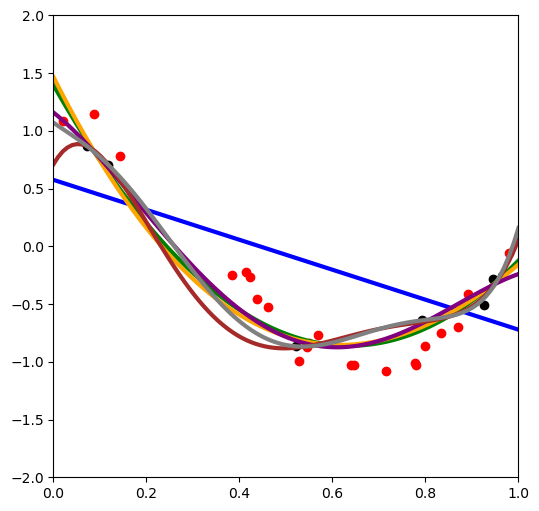

model1 R^2: 0.2711302208377858
model2 R^2: 0.8949477667904466
model3 R^2: 0.8726669019669439
model4 R^2: 0.8857054823865711
model5 R^2: 0.785494492826686
model6 R^2: 0.8391595177600163


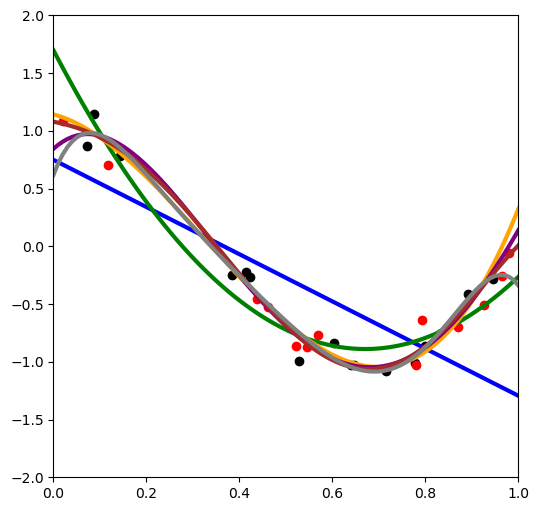

model1 R^2: 0.13477222255208787
model2 R^2: 0.9065194815625409
model3 R^2: 0.9386454805772412
model4 R^2: 0.9473407454087586
model5 R^2: 0.9587969793404632
model6 R^2: 0.9290105310468281


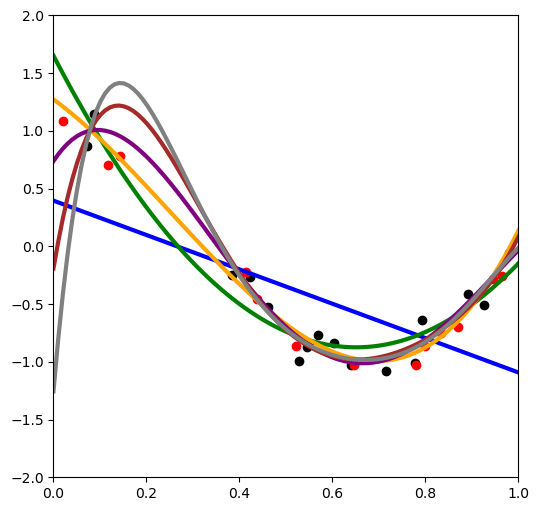

model1 R^2: 0.537588669082459
model2 R^2: 0.9254769010574033
model3 R^2: 0.9806330241752567
model4 R^2: 0.9607593847917161
model5 R^2: 0.8053645623605115
model6 R^2: 0.493494282209748


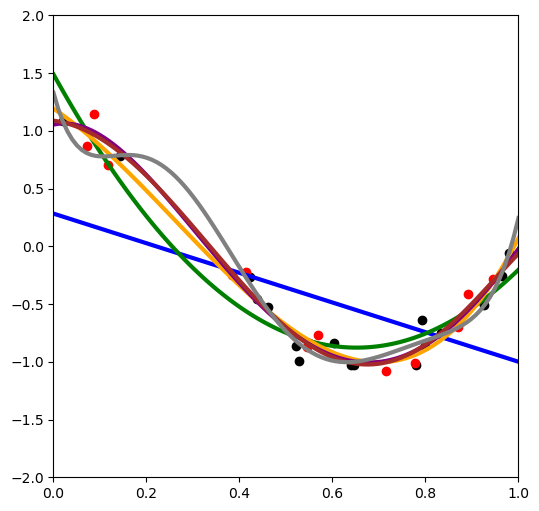

model1 R^2: 0.5240062742869933
model2 R^2: 0.9368734497866685
model3 R^2: 0.9744266192394042
model4 R^2: 0.9719774571315616
model5 R^2: 0.9746595148525204
model6 R^2: 0.9485548167690527


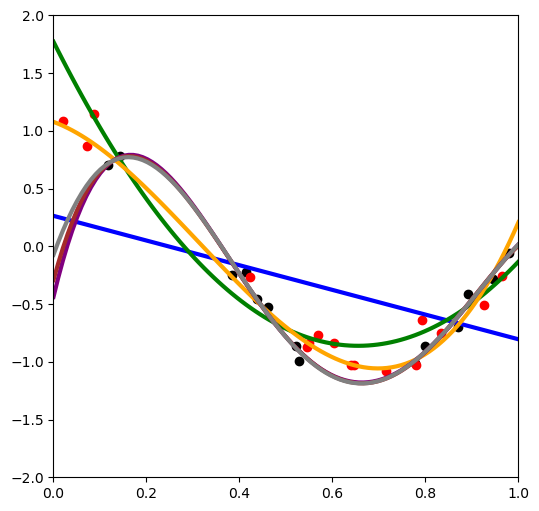

model1 R^2: 0.46766395075060696
model2 R^2: 0.9198241524071997
model3 R^2: 0.9679294843556349
model4 R^2: 0.7302627757529443
model5 R^2: 0.7641135722517995
model6 R^2: 0.8065240958860996


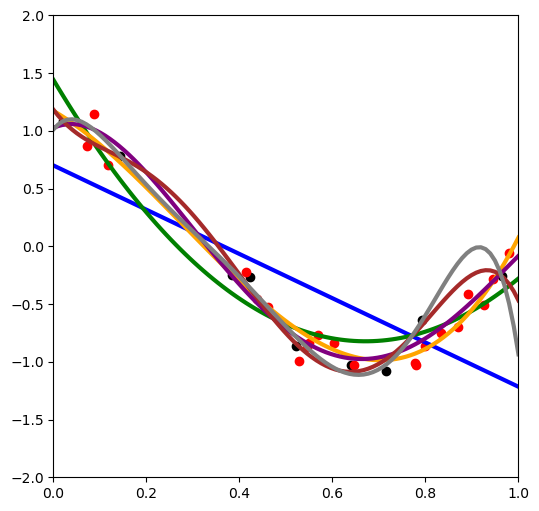

model1 R^2: 0.3691978592451829
model2 R^2: 0.9251942182647933
model3 R^2: 0.9692103442110803
model4 R^2: 0.9602803030241168
model5 R^2: 0.9006266383024722
model6 R^2: 0.8151860385312648


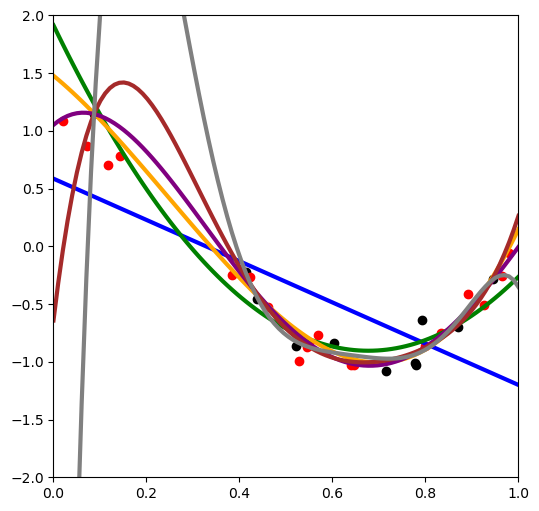

model1 R^2: 0.420317758673578
model2 R^2: 0.8705651638465788
model3 R^2: 0.9413831477112007
model4 R^2: 0.9509265364556273
model5 R^2: 0.7362035209940279
model6 R^2: -9.688702953621338


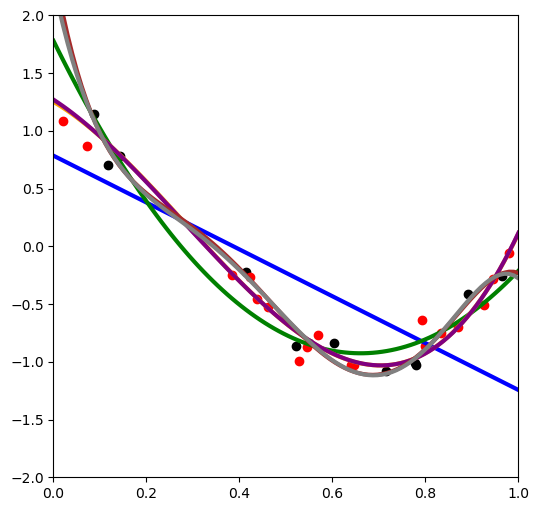

model1 R^2: 0.23973472598801704
model2 R^2: 0.8691600395335364
model3 R^2: 0.9582884537752877
model4 R^2: 0.9570447591971685
model5 R^2: 0.7854921577169107
model6 R^2: 0.8125754359833466


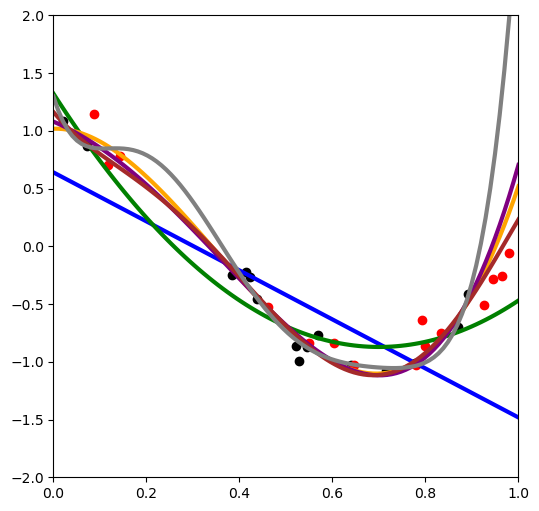

model1 R^2: 0.03690304406363687
model2 R^2: 0.8898667526800107
model3 R^2: 0.9089652861222046
model4 R^2: 0.8628780652810648
model5 R^2: 0.9394454601852843
model6 R^2: -0.18975744748822243


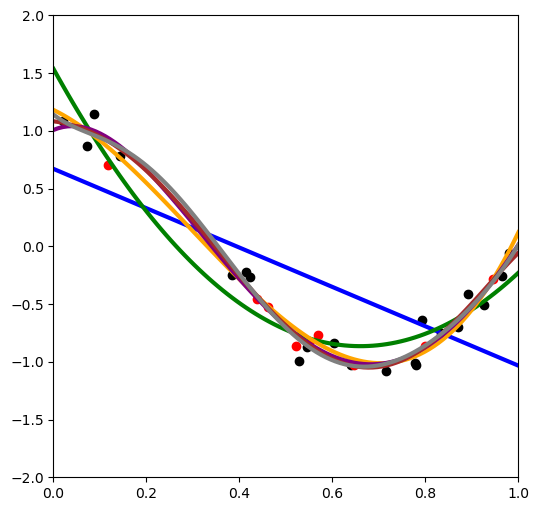

model1 R^2: 0.02270697636093677
model2 R^2: 0.9519842979343637
model3 R^2: 0.9742300781014731
model4 R^2: 0.9638850354744188
model5 R^2: 0.9676783771825926
model6 R^2: 0.9663956287748943


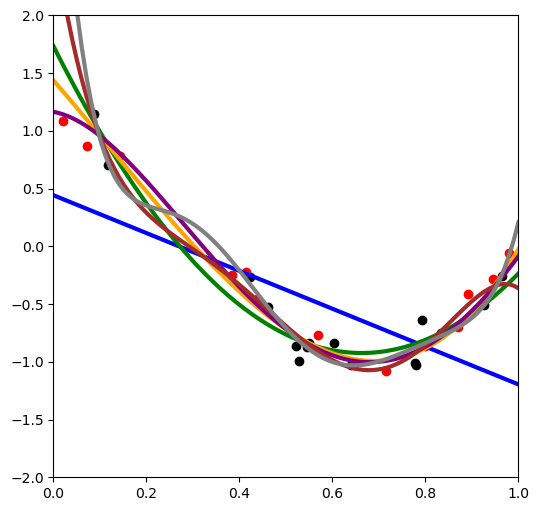

model1 R^2: 0.395640659674969
model2 R^2: 0.8875326682474024
model3 R^2: 0.9591182288984209
model4 R^2: 0.9756271822655099
model5 R^2: 0.7450077067980805
model6 R^2: 0.16821344040373531


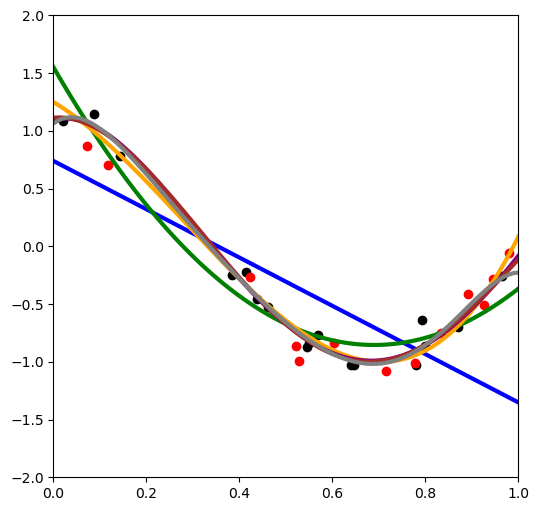

model1 R^2: 0.03501859639295524
model2 R^2: 0.8830975709737576
model3 R^2: 0.9508047329718542
model4 R^2: 0.9420959365108321
model5 R^2: 0.9440024394319874
model6 R^2: 0.938775345702548


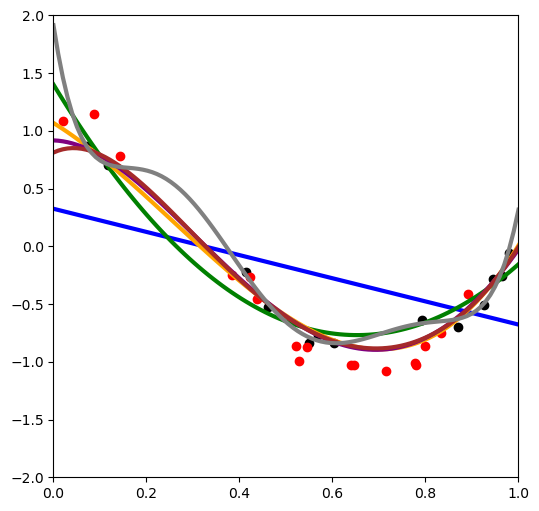

model1 R^2: 0.3623433589836812
model2 R^2: 0.8972143129881066
model3 R^2: 0.9449934458751603
model4 R^2: 0.9451337376565088
model5 R^2: 0.9405443404192211
model6 R^2: 0.8977542245718775


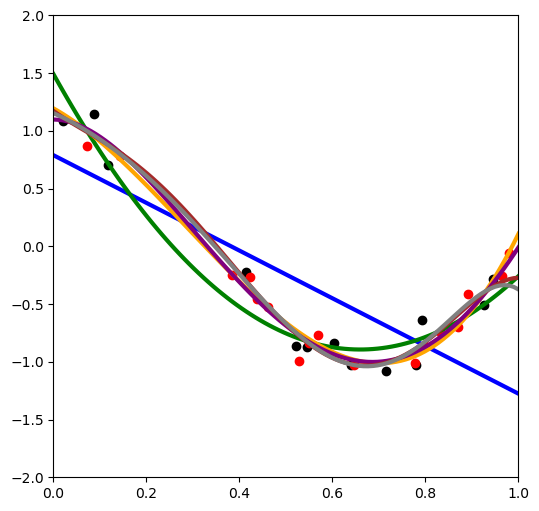

model1 R^2: 0.1265035526377829
model2 R^2: 0.900453367406626
model3 R^2: 0.9690431137319302
model4 R^2: 0.9706184597750107
model5 R^2: 0.9627195752603204
model6 R^2: 0.9561491491707484


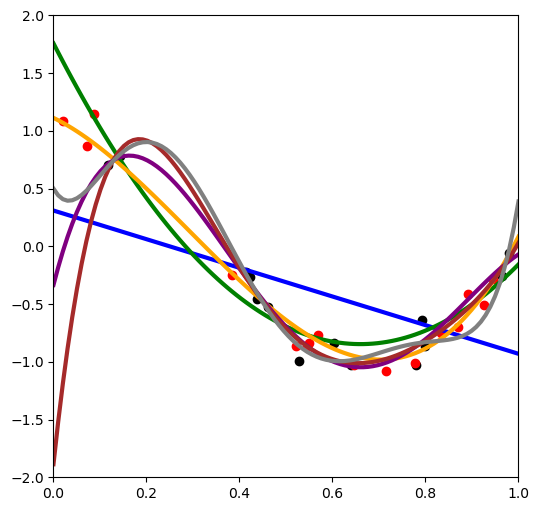

model1 R^2: 0.5131348173821499
model2 R^2: 0.9230778667900218
model3 R^2: 0.9788417862069574
model4 R^2: 0.7758481810405874
model5 R^2: 0.21269425284248678
model6 R^2: 0.845850492601828


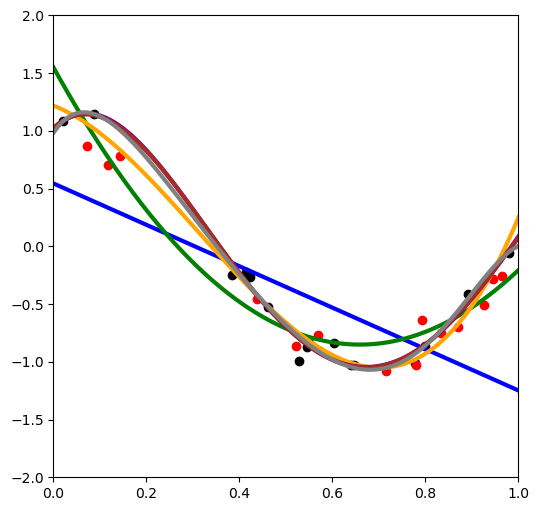

model1 R^2: 0.4293386426298377
model2 R^2: 0.9518187812788741
model3 R^2: 0.9505168725501989
model4 R^2: 0.9173696162923244
model5 R^2: 0.9202245251702099
model6 R^2: 0.9154772749276193


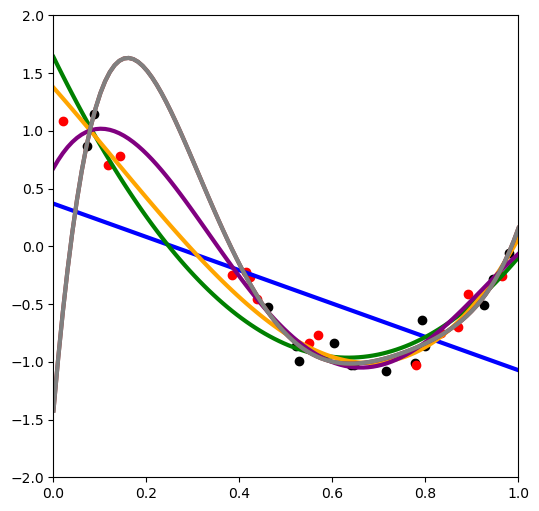

model1 R^2: 0.5527158492557598
model2 R^2: 0.8520892904703529
model3 R^2: 0.9454640634335677
model4 R^2: 0.9416591926454435
model5 R^2: 0.2411123476693261
model6 R^2: 0.24010731059497403


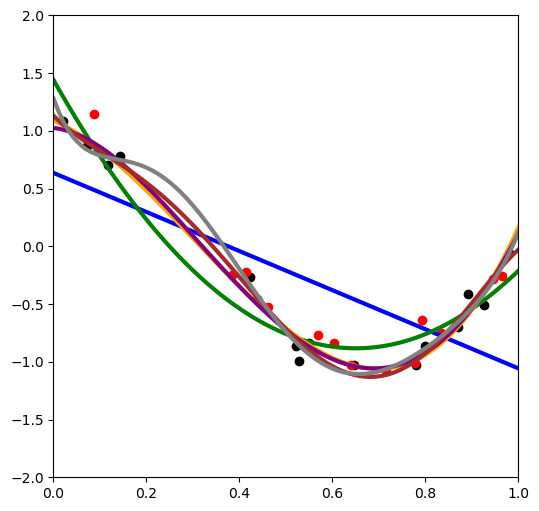

model1 R^2: 0.26109990746303735
model2 R^2: 0.8908609126107574
model3 R^2: 0.935481106896054
model4 R^2: 0.9395599704105753
model5 R^2: 0.9302653782250037
model6 R^2: 0.9210867511719162


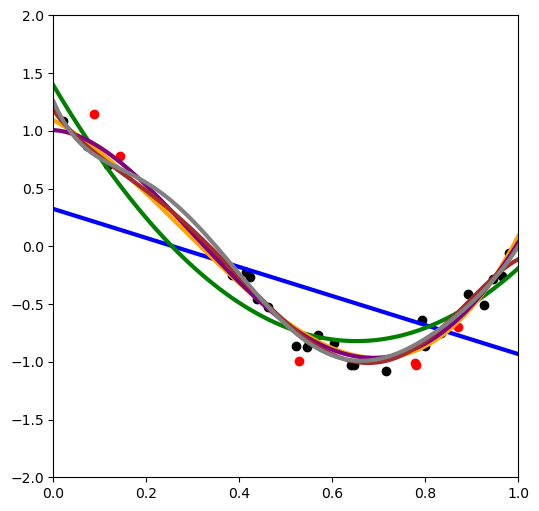

model1 R^2: 0.6007399793204529
model2 R^2: 0.9190712479830518
model3 R^2: 0.9603242318437666
model4 R^2: 0.9649057063140513
model5 R^2: 0.9511967688104184
model6 R^2: 0.9490047591633651


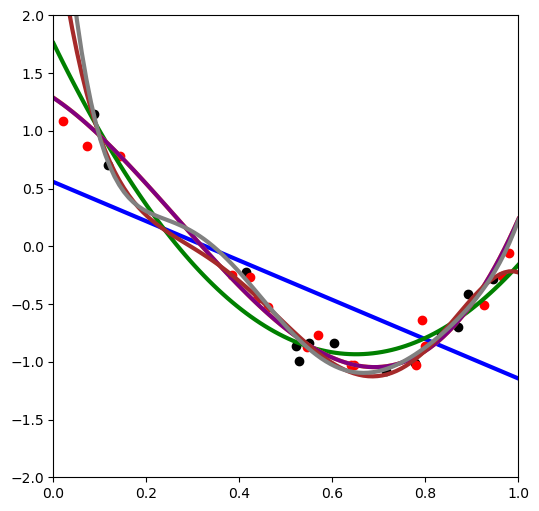

model1 R^2: 0.4540589859873989
model2 R^2: 0.893869763254773
model3 R^2: 0.9609007085351166
model4 R^2: 0.9609822852619649
model5 R^2: 0.714222247634285
model6 R^2: 0.3877232240268499


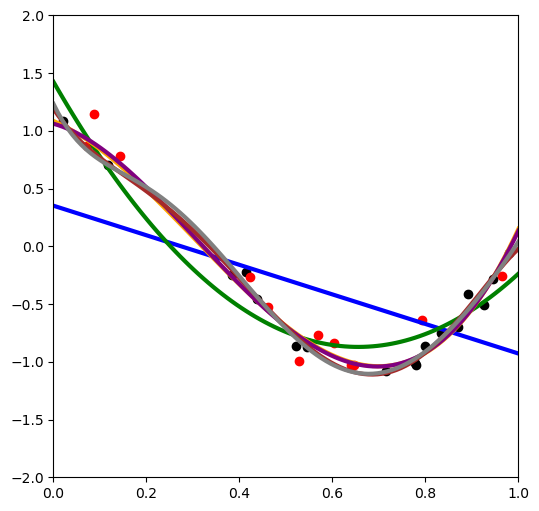

model1 R^2: 0.4974028845737529
model2 R^2: 0.9410560814134005
model3 R^2: 0.9581119802646706
model4 R^2: 0.9599402592851458
model5 R^2: 0.9486350275144484
model6 R^2: 0.9466489219586675


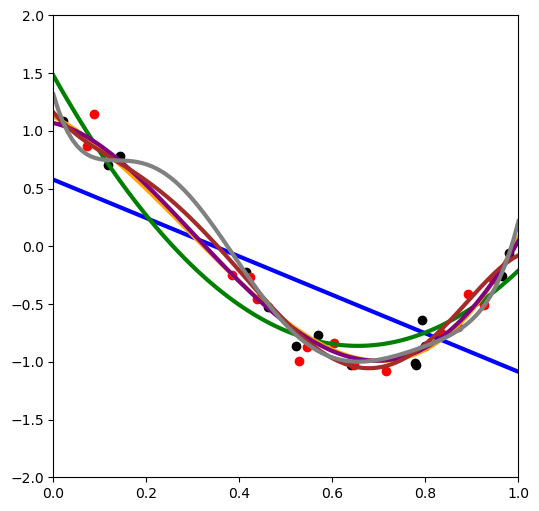

model1 R^2: 0.44584876310495714
model2 R^2: 0.9280550217507072
model3 R^2: 0.9621722106015292
model4 R^2: 0.9653493023100614
model5 R^2: 0.9596528299437896
model6 R^2: 0.940839345574767


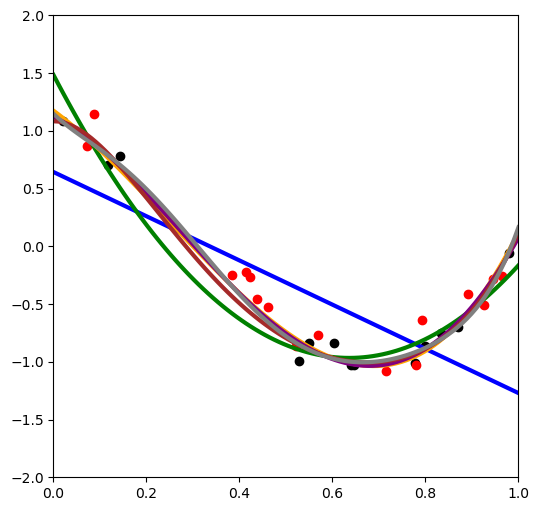

model1 R^2: 0.2837112188495916
model2 R^2: 0.8350439393124547
model3 R^2: 0.9303869723301801
model4 R^2: 0.931888351445692
model5 R^2: 0.9044100907861752
model6 R^2: 0.9238444257792968


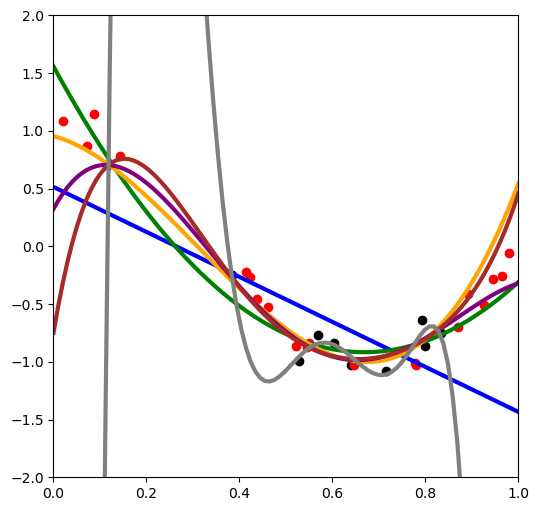

model1 R^2: 0.19097056322280814
model2 R^2: 0.9157235786434802
model3 R^2: 0.8999259866149814
model4 R^2: 0.8984677837317425
model5 R^2: 0.6810896176936845
model6 R^2: -906.3422867462987


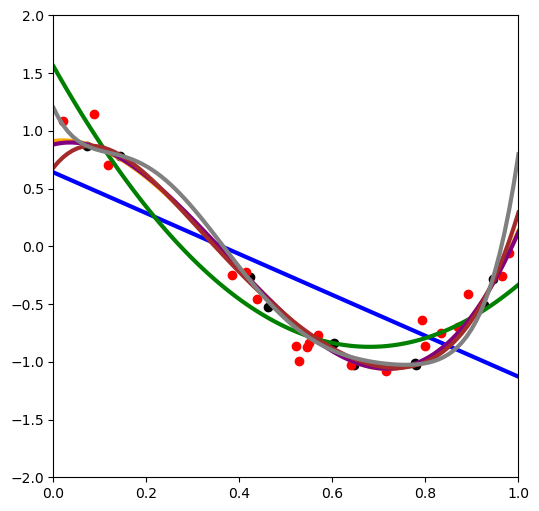

model1 R^2: 0.4084243788738511
model2 R^2: 0.9219825515727919
model3 R^2: 0.9378755538999135
model4 R^2: 0.938234756784435
model5 R^2: 0.9202502173131315
model6 R^2: 0.903439379020934


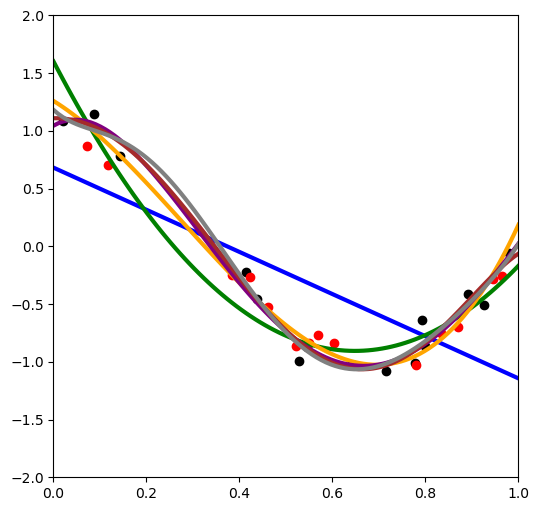

model1 R^2: 0.36067053439167174
model2 R^2: 0.9205232499122178
model3 R^2: 0.9634898680995571
model4 R^2: 0.940844740961253
model5 R^2: 0.9433047338086146
model6 R^2: 0.9425452282001693


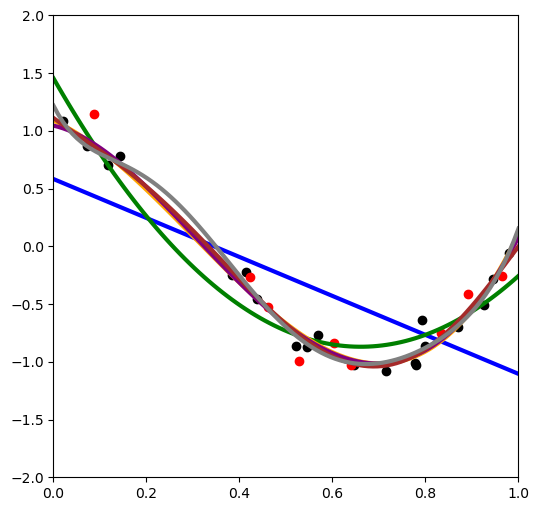

model1 R^2: 0.3052570963875807
model2 R^2: 0.9143382394835967
model3 R^2: 0.9409263994336321
model4 R^2: 0.9450029846072009
model5 R^2: 0.9476070504274539
model6 R^2: 0.9394420403922297


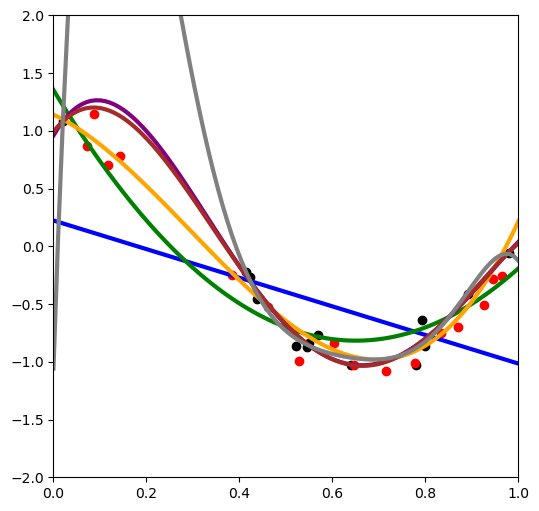

model1 R^2: 0.46101307782192347
model2 R^2: 0.9345301349398961
model3 R^2: 0.9704491892021238
model4 R^2: 0.8996128367502954
model5 R^2: 0.9197518378556898
model6 R^2: -5.2716534251991645


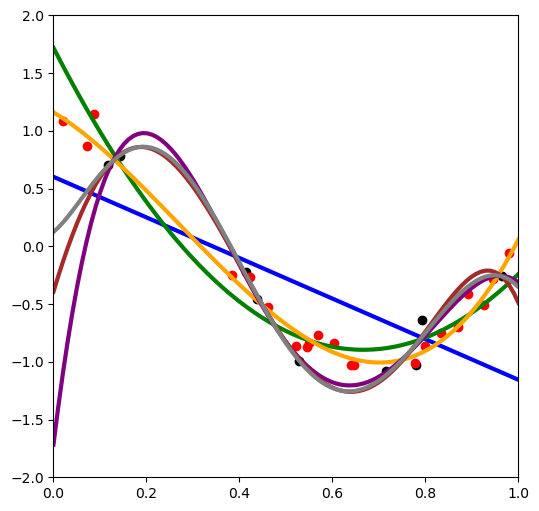

model1 R^2: 0.43340446801409604
model2 R^2: 0.9229988813416569
model3 R^2: 0.9788540003708639
model4 R^2: 0.23868105928025674
model5 R^2: 0.6608743307680387
model6 R^2: 0.7651242069246771


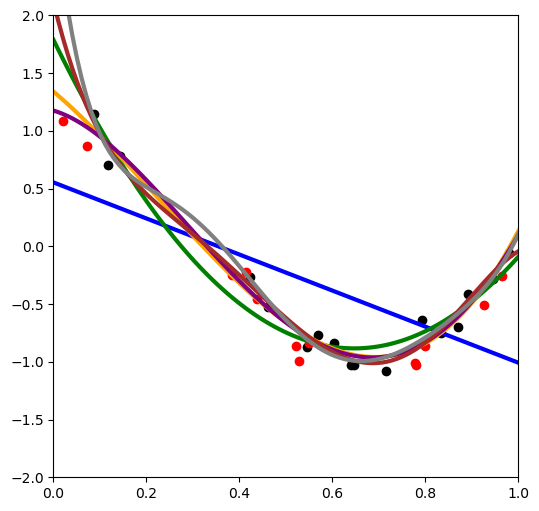

model1 R^2: 0.5142435000925073
model2 R^2: 0.8614754794362085
model3 R^2: 0.9520982754224914
model4 R^2: 0.9614701564838447
model5 R^2: 0.8497632059132036
model6 R^2: 0.6564817463227461


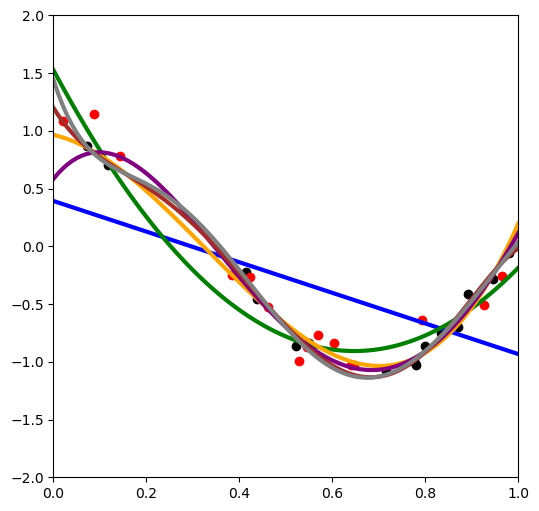

model1 R^2: 0.48491156451612216
model2 R^2: 0.9348771441003281
model3 R^2: 0.9522512679823742
model4 R^2: 0.9350806629406966
model5 R^2: 0.9476619269684876
model6 R^2: 0.9436712492394732


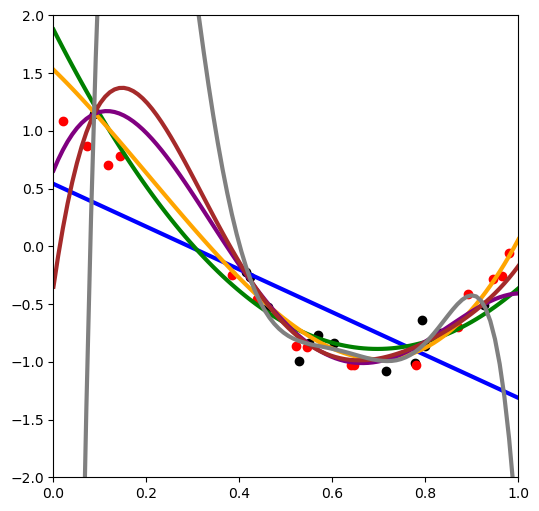

model1 R^2: 0.2924700461499371
model2 R^2: 0.8507447781530462
model3 R^2: 0.9388124214342068
model4 R^2: 0.9018404718004494
model5 R^2: 0.7703343565039673
model6 R^2: -36.76424353634548


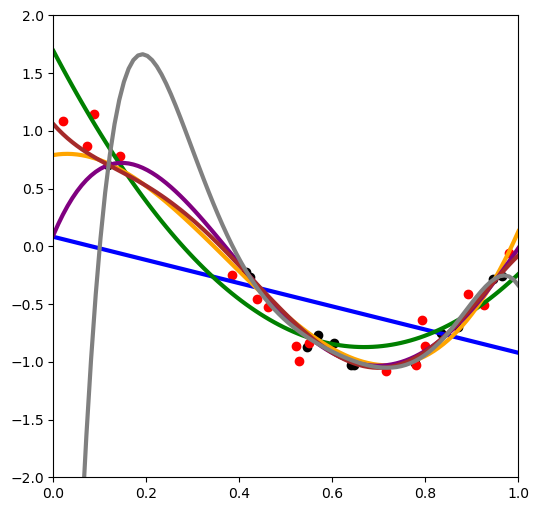

model1 R^2: 0.38379819912261537
model2 R^2: 0.9301284840817731
model3 R^2: 0.9381397797054811
model4 R^2: 0.8605271318667238
model5 R^2: 0.9478006755788242
model6 R^2: -6.625906072912483


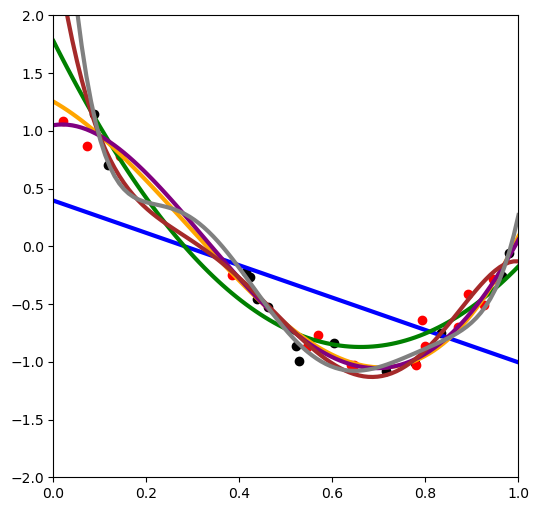

model1 R^2: 0.554145869058653
model2 R^2: 0.9133891945309294
model3 R^2: 0.9680460312758062
model4 R^2: 0.9738602971686349
model5 R^2: 0.7755288994354503
model6 R^2: 0.2326718972731805


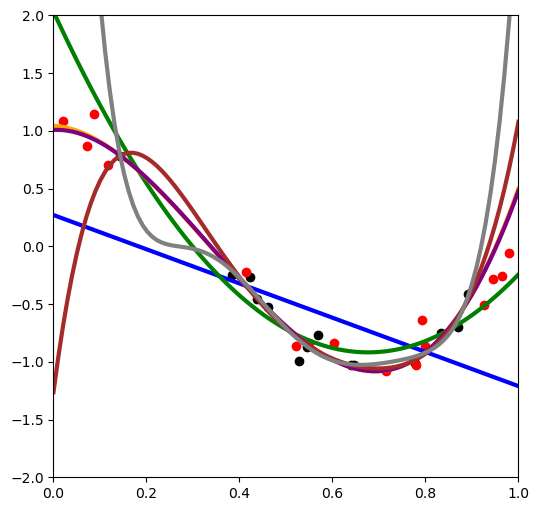

model1 R^2: 0.3038045769307324
model2 R^2: 0.8404520183967229
model3 R^2: 0.9315738748992414
model4 R^2: 0.934177793169983
model5 R^2: 0.38820763455933105
model6 R^2: -7.818702593079715


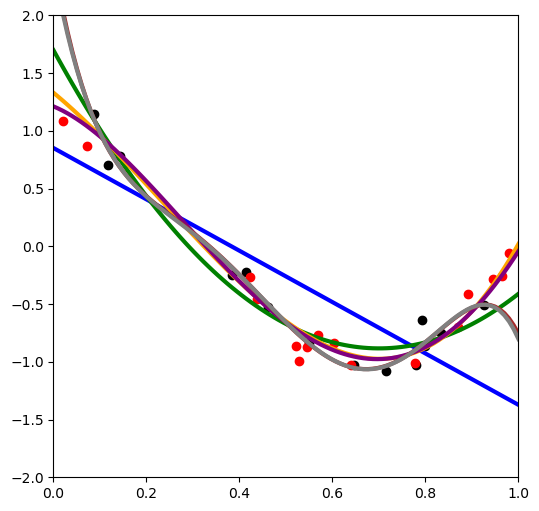

model1 R^2: -0.012123688798080456
model2 R^2: 0.8417359700083424
model3 R^2: 0.9561811284263821
model4 R^2: 0.9619986231195814
model5 R^2: 0.7158385928663307
model6 R^2: 0.7184595228139921


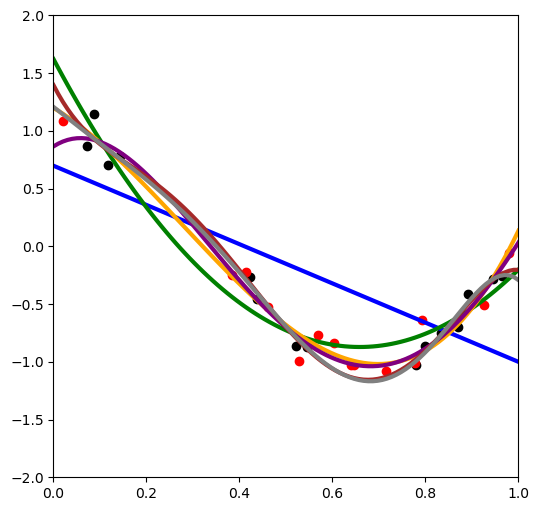

model1 R^2: 0.11697103476249082
model2 R^2: 0.8715909191321147
model3 R^2: 0.9526780009712916
model4 R^2: 0.949432196649072
model5 R^2: 0.9240228410235087
model6 R^2: 0.9239625104269197


In [11]:
for i in range(100):
    s = np.random.random_sample(n_samples)
    s[s>0.5]=1
    s[s<=0.5]=0
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    
    X1 = np.vstack(X1)
    X2 = np.vstack(X2)
    
    model1 = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
    model1.fit(X1, y1)
    model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
    model2.fit(X1, y1)
    model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
    model3.fit(X1, y1)
    model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
    model4.fit(X1, y1)
    model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
    model5.fit(X1, y1)
    model6 = make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression())    
    model6.fit(X1, y1)
    
    # Plot outputs
    plt.figure(figsize=(6,6));
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([-2,2])
    plt.scatter(X1, y1,  color='black')
    plt.scatter(X2, y2,  color='red')
    x_plot = np.vstack(np.linspace(0, 1, 100))
    plt.plot(x_plot, model1.predict(x_plot), color='blue',linewidth=3)
    plt.plot(x_plot, model2.predict(x_plot), color='green',linewidth=3)
    plt.plot(x_plot, model3.predict(x_plot), color='orange',linewidth=3)
    plt.plot(x_plot, model4.predict(x_plot), color='purple',linewidth=3)
    plt.plot(x_plot, model5.predict(x_plot), color='brown',linewidth=3)
    plt.plot(x_plot, model6.predict(x_plot), color='gray',linewidth=3)
    plt.show()
    print("model1 R^2: {}".format(metrics.r2_score(y2, model1.predict(X2))))
    print("model2 R^2: {}".format(metrics.r2_score(y2, model2.predict(X2))))
    print("model3 R^2: {}".format(metrics.r2_score(y2, model3.predict(X2))))
    print("model4 R^2: {}".format(metrics.r2_score(y2, model4.predict(X2))))
    print("model5 R^2: {}".format(metrics.r2_score(y2, model5.predict(X2))))
    print("model6 R^2: {}".format(metrics.r2_score(y2, model6.predict(X2))))
    